In [3]:
from DataBase import DataBase
from utils.utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import scipy.constants as sc
from matplotlib import transforms
from sklearn.model_selection import ParameterGrid

plt.style.use('publication')
warnings.filterwarnings('ignore')


### IMPORTING DB

In [8]:
db3 = DataBase('./database/flat_profile/bm_study.db')
df3 = db3.to_pandas()
df_metrics3 = df3[['amplitude','lcx', 'lcy', 'bm', 'L', 'R', 'teta', 'td0', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]

In [9]:
db4 = DataBase('./database/flat_profile/bm_study.db')
df4 = db4.to_pandas()
df_metrics4 = df4[['amplitude','lcx', 'lcy', 'bm', 'L', 'R', 'teta', 'td0', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]

In [12]:
db5 = DataBase('./database/curved_profile/R_study.db')

df5 = db5.to_pandas()
df_metrics5 = df5[['amplitude','lcx', 'lcy', 'bm', 'L', 'R', 'teta', 'td0', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]

In [13]:
db6 = DataBase('./database/curved_profile/teta_study.db')

df6 = db6.to_pandas()
df_metrics6 = df6[['amplitude','lcx', 'lcy', 'bm', 'L', 'R', 'teta', 'td0', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]

In [14]:
db8 = DataBase('./database/curved_profile/general.db')
df8 = db8.to_pandas()
df_metrics8 = df8[['amplitude','lcx', 'lcy', 'bm', 'L', 'R', 'teta', 'td0', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]


In [15]:
db9 = DataBase('./database/curved_profile/power_spectrum_1.db')
df9 = db9.to_pandas()
df_metrics9 = df9[['amplitude','lcx', 'lcy', 'bm', 'L', 'R', 'teta', 'td0', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]

In [22]:
db10 = DataBase('./database/curved_profile/data_10.db')
df10 = db10.to_pandas()
params = np.load('./database/params10.npy', allow_pickle=True).item()
df10['L'], df10['R'], df10['teta'] = params['L'], params['R'], params['teta']
df_metrics10 = df10[['amplitude','lcx', 'lcy', 'bm', 'L', 'R', 'teta', 'td0', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]

In [24]:
db11 = DataBase('./database/curved_profile/data_11.db')
df11 = db11.to_pandas()
params = np.load('./database/params11.npy', allow_pickle=True).item()
df11['L'], df11['R'], df11['teta'] = params['L'], params['R'], params['teta']
df_metrics11 = df11[['amplitude','lcx', 'lcy', 'bm', 'L', 'R', 'teta', 'td0', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]

In [16]:
# df9['lcx'] = df9['rho_larmor'] * 1.19402632 +  0.00121852
# df9['lcy'] = df9['rho_larmor'] * 1.35459058 +  0.00152604

HYSTERESIS SKEWNESS OF DELAY DISTRIBUTION

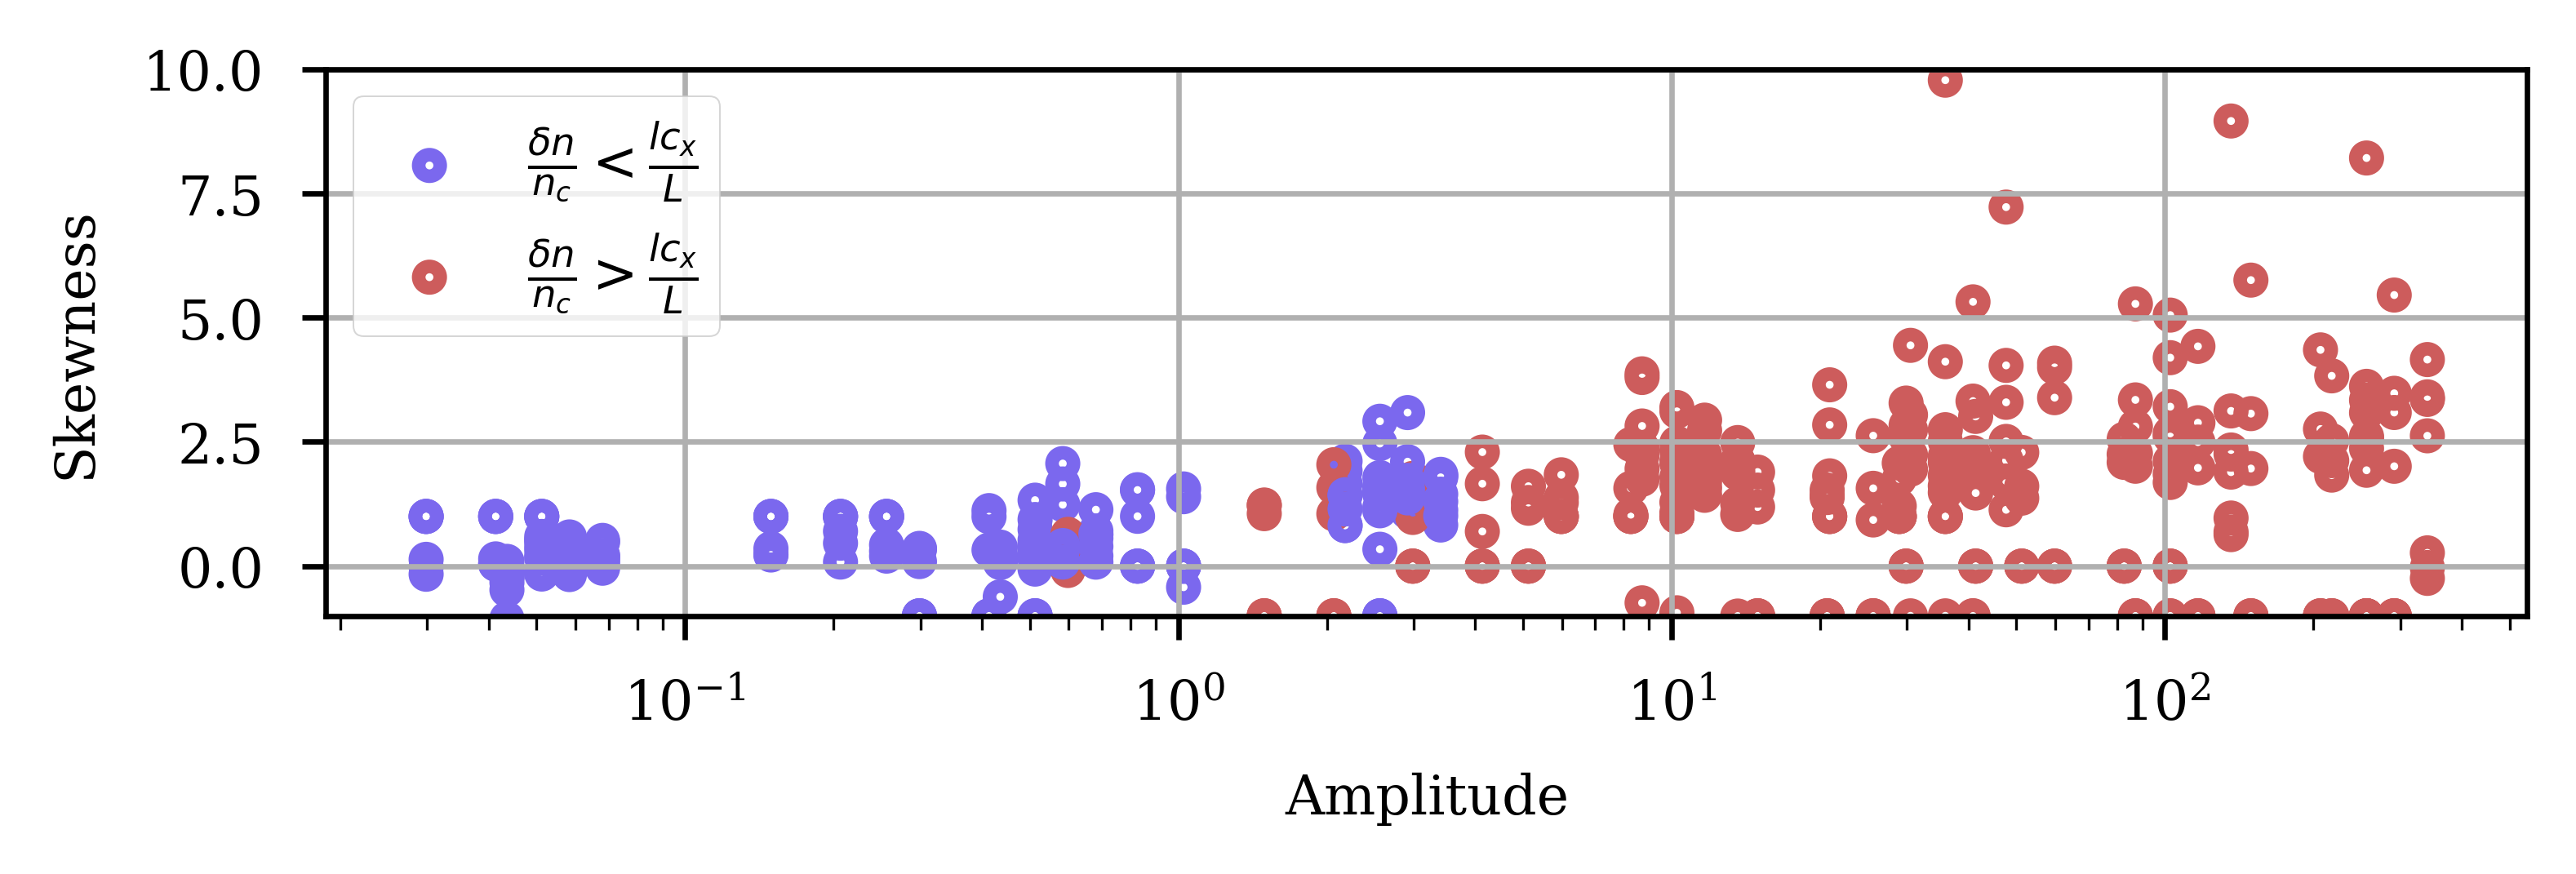

In [198]:
W = 5.8
fig, ax = plt.subplots(figsize=(W, W * 1/4))


sk = np.array([skew(abs(df3['delay_list'][i])) for i in range(len(df3))])

amp = df3['amplitude'][mask]
sk_1 = sk[mask]
nc = 3e8/(51e9 * 2 * np.pi)/np.sqrt(df3[mask]['lcx']*df3[mask]['L']*np.log(df3[mask]['L']/df3[mask]['lcx']))
amp = amp / nc

amp_2 = df3['amplitude'][~mask]
sk_2 = sk[~mask]
nc = 3e8/(51e9 * 2 * np.pi)/np.sqrt(df3[~mask]['lcx']*df3[~mask]['L']*np.log(df3[~mask]['L']/df3[~mask]['lcx']))
amp_2 = amp_2 / nc

ax.scatter(amp, sk_1, ec = 'mediumslateblue', fc = 'none', lw  = 2, s = 10)
ax.scatter(amp_2, sk_2, ec = 'indianred', fc = 'none', lw  = 2, s = 10)

ax.set_xscale('log')
ax.set_xlabel('Amplitude')
ax.set_ylabel('Skewness')
ax.legend()
ax.grid()
ax.set_ylim(-1,10)

ax.set_xscale('log')
ax.set_xlabel('Amplitude')
ax.set_ylabel('Skewness')
ax.legend()


CREATING THE INPUT DATASET

In [18]:
bins = np.linspace(0.2,0.8,30 , endpoint=True)


In [ ]:
from scipy.optimize import curve_fit

def gaussian(x, a : float, b: float,  c : float) :
    return a * np.exp(- (b - x) ** 2 /(2 * c ** 2))

cf = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_norm, axis = 1))])
cf_2 = np.array([curve_fit(gaussian, range(len(pulse)from scipy.optimize import curve_fit

def gaussian(x, a : float, b: float,  c : float) :
    return a * np.exp(- (b - x) ** 2 /(2 * c ** 2))

cf = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_norm, axis = 1))])
cf_2 = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_4, axis = 1))])
cf_3 = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_quad, axis = 1))])), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_4, axis = 1))])
cf_3 = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_quad, axis = 1))])

In [19]:
# delay_ = np.array([df['delay_list'][i] for i in range(0, len(df))])
# hist_td = np.quantile(delay_,bins, axis = 1)
# df_metrics = df_metrics.join(pd.DataFrame(hist_td.T, columns = [f'distr_{i}' for i in range(len(bins))]))

# delay_2 = np.array([df2['delay_list'][i] for i in range(0, len(df2))])
# hist_td2 = np.quantile(delay_2,bins, axis = 1)
# df_metrics2 = df_metrics2.join(pd.DataFrame(hist_td2.T, columns = [f'distr_{i}' for i in range(len(bins))]))

delay_3 = np.array([df3['delay_list'][i] for i in range(0, len(df3))])
hist_td3 = np.quantile(delay_3,bins, axis = 1)
df_metrics3 = df_metrics3.join(pd.DataFrame(hist_td3.T, columns = [f'distr_{i}' for i in range(len(bins))]))

delay_4 = np.array([df4['delay_list'][i] for i in range(0, len(df4))])
hist_td4 = np.quantile(delay_4,bins, axis = 1)
df_metrics4 = df_metrics4.join(pd.DataFrame(hist_td4.T, columns = [f'distr_{i}' for i in range(len(bins))]))

delay_5 = np.array([df5['delay_list'][i] for i in range(0, len(df5))])
hist_td5 = np.quantile(delay_5,bins, axis = 1)
df_metrics5 = df_metrics5.join(pd.DataFrame(hist_td5.T, columns = [f'distr_{i}' for i in range(len(bins))]))

delay_6 = np.array([df6['delay_list'][i] for i in range(0, len(df6))])
hist_td6 = np.quantile(delay_6,bins, axis = 1)
df_metrics6 = df_metrics6.join(pd.DataFrame(hist_td6.T, columns = [f'distr_{i}' for i in range(len(bins))]))

delay_8 = np.array([df8['delay_list'][i] for i in range(0, len(df8))])
hist_td8 = np.quantile(delay_8,bins, axis = 1)
df_metrics8 = df_metrics8.join(pd.DataFrame(hist_td8.T, columns = [f'distr_{i}' for i in range(len(bins))]))

delay_9 = np.array([df9['delay_list'][i] for i in range(0, len(df9))])
hist_td9 = np.quantile(delay_9,bins, axis = 1)
df_metrics9 = df_metrics9.join(pd.DataFrame(hist_td9.T, columns = [f'distr_{i}' for i in range(len(bins))]))


In [24]:
df6.groupby('teta')['delay_list'].mean().apply(lambda x : np.quantile(x, np.linspace(0.2,0.8,40)))

teta
1     [(4.404635076252726e-09+0j), (4.40754524886877...
5     [(4.424624183006537e-09+0j), (4.42621543489190...
10    [(4.471160130718955e-09+0j), (4.47409586056644...
Name: delay_list, dtype: object

In [22]:
df_metrics = pd.concat([df_metrics3, df_metrics4, df_metrics5, df_metrics6, df_metrics8, df_metrics9])
df_metrics['amplitude'] = np.log(df_metrics['amplitude'])
df_metrics.drop(columns=['bm'], inplace=True)
mask = (df_metrics['std_delays'] < 5e-11) & (df_metrics['amplitude'] > -4)
df_metrics = df_metrics[~mask]
df_metrics.reset_index(drop=True, inplace=True)

In [24]:
df_metrics['R'] = 1 / df_metrics['R']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()

PASS THIS PART

In [27]:
label = ['AMP', 'lcx', 'lcy', 'MMP', 'SM', 'MK', 'HM', 'SD', 'MD', 'MPW', 'MPA', 'L', 'R', 'theta']
df_metrics_plot = df_metrics.copy()
df_metrics_plot.columns = label + [f'distr_{k}' for k in range(30)] + ['td0']

In [28]:
chord1 = df_metrics_plot.drop(columns=[f'distr_{k}' for k in range(30)]).corr(method='spearman')
chord = (100 * abs(chord1)).astype(int).stack().reset_index()
chord1 = chord1.astype(float).stack().reset_index()

chord.columns = ['source', 'target', 'value']
chord1.columns = ['source', 'target', 'value']

chord = chord.loc[chord['value'] > 55].sort_values(by = 'value', ascending = False)
chord = chord.loc[chord['source'] != chord['target']]
chord1 = chord1.loc[chord.index]

import pandas as pd
import holoviews as hv
import matplotlib.pyplot as plt
from holoviews import opts, dim
def font_size(plot, element):
    labels = plot.handles["labels"]
    for i, annotation in enumerate(labels):
        annotation.set_size(10)
        annotation.set_family('monospace')
        annotation.set_weight('bold')
        pos = annotation.get_position()
        annotation.set_verticalalignment('center')
        annotation.set_horizontalalignment('center')
        pad = 0.03
        annotation.set_position((pos[0] + pad* np.cos(np.arctan2(pos[1], pos[0])), pos[1] + pad * np.sin(np.arctan2(pos[1], pos[0]))))
        annotation.set_rotation(-90 + np.rad2deg(np.arctan2(pos[1], pos[0])))


hv.extension('matplotlib')
hv.output(fig='svg', size=200)
chords = hv.Chord(chord)
chords.opts(
    opts.Chord(edge_cmap='coolwarm', edge_color=dim('value'), edge_linewidth=dim('value')/10, labels = 'index' ,node_size=4, edge_alpha= 0.8,bgcolor="white",
                node_linewidth = 4, fontsize = {'ticks':20}, hooks = [font_size], node_color = 'index', node_cmap = 'Category20', node_facecolors = 'black')
)

# chords2 = hv.Chord(chord2)
# chords2.opts(
#     opts.Chord(edge_cmap='Greys', edge_color=dim('value'), labels = 'index', edge_linewidth=dim('value')* 10  , node_size=25, edge_alpha=0.9,bgcolor="white",
#                 node_linewidth = 0, fontsize = {'ticks':20, 'title':39}, hooks = [font_size], node_color = 'index', node_cmap = 'Pastel1')
# )

hv.save(chords, 'chord.pdf', fmt='pdf', dpi = 600)

TRAINING

In [28]:
# df_metrics.drop(columns=['L'], inplace= True)
df_metrics.drop(df_metrics[df_metrics[[f'distr_{i}' for i in range(30)]].sum(axis=1) == 0].index, inplace = True)
df_metrics.drop(columns=['hysteresis_mean'], inplace=True)
input_data = df_metrics.drop(columns = ['td0', 'amplitude'], inplace = False).astype(float)
input_rescaled = pd.DataFrame(scaler.fit_transform(input_data), columns = input_data.columns, index = input_data.index)
X_train, X_test, y_train, y_test = train_test_split(input_rescaled, df_metrics[['td0', 'amplitude']], test_size=0.2, random_state=42)

In [29]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, hidden_layer_sizes=(20,20, 2), learning_rate='adaptive', activation='tanh').fit(X_train, y_train)

In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [31]:
estimators = [("KNN" , KNeighborsRegressor(n_neighbors=20)),
              ("RF" , RandomForestRegressor(max_depth=40, n_estimators=300, n_jobs = -1)),
              ("GB" , GradientBoostingRegressor(n_estimators=200, learning_rate=0.005)),
              ("LGBM" , LGBMRegressor(n_estimators=200, learning_rate=0.005, n_jobs=-1, force_row_wise=True, objective='regression', verbose = 0)),
              ("XGB" , XGBRegressor(n_estimators=200, learning_rate=0.005, objective='reg:squarederror', n_jobs=-1)),
              ("SVR" , SVR(kernel='rbf', C=1, epsilon=0.01))]


In [32]:
from ML_model import ML_model
import pickle

model = RegressorChain(StackingRegressor(estimators = estimators, final_estimator= RandomForestRegressor(max_depth=30, n_estimators=300, criterion='absolute_error', n_jobs=-1) , cv = 10, passthrough = True))


In [173]:
model.fit(X_train, y_train)

RegressorChain(base_estimator=StackingRegressor(cv=10,
                                                estimators=[('KNN',
                                                             KNeighborsRegressor(n_neighbors=20)),
                                                            ('RF',
                                                             RandomForestRegressor(max_depth=40,
                                                                                   n_estimators=300,
                                                                                   n_jobs=-1)),
                                                            ('GB',
                                                             GradientBoostingRegressor(learning_rate=0.005,
                                                                                       n_estimators=200)),
                                                            ('LGBM',
                                                             LGBMR

In [174]:
mask = (df_metrics['std_delays'] < 1e-11) & (df_metrics['amplitude'] > -4)
mask.sum()

0

In [33]:
power_data = df_metrics9.drop(columns = ['td0', 'amplitude','bm', 'hysteresis_mean'], inplace = False)
df_metrics9['amplitude'] = np.log(df_metrics9['amplitude'])
power_data['R'] = 1 / power_data['R']
power_data_rescaled = pd.DataFrame(scaler.transform(abs(power_data)), columns = power_data.columns, index = power_data.index)


In [35]:
model.score(power_data_rescaled, df_metrics9[['td0', 'amplitude']])

0.8987236989666892

In [285]:
(abs(np.exp(model.predict(power_data_rescaled)[:,1]) - np.exp(df_metrics9['amplitude'])) / np.exp(df_metrics9['amplitude'])).mean()

0.2437967345975014

In [36]:
model.score(X_test, y_test)

0.9194351970700612

In [197]:
pickle.dump(model, open('model.pkl', 'wb'))

In [34]:
model = pickle.load(open('model.pkl', 'rb'))

VALIDATION DATASETS

In [ ]:
['amplitude','lcx', 'lcy', 'bm', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp', 'td0']

In [45]:
from scipy.stats import skew, kurtosis

In [37]:
# pulse_norm = np.load('./extract_data/pulse_norm.npy')
delay_list_norm = np.load('./1d_approach/extract_data/delay_list_norm.npy')
amplitude_norm = np.load('./1d_approach/extract_data/amplitude_norm.npy')
pulse_list_norm = np.load('./1d_approach/extract_data/pulse_norm.npy')

# pulse_norm = np.load('./extract_data/pulse_norm.npy')
delay_list_norm_2 = np.load('./1d_approach/extract_data/delay_list_norm_2.npy')
amplitude_norm_2 = np.load('./1d_approach/extract_data/amplitude_norm_2.npy')
pulse_list_norm_2 = np.load('./1d_approach/extract_data/pulse_norm_2.npy')


In [38]:
td = np.mean(delay_list_norm[0])
amp1 = np.log(amplitude_norm)
bins =  np.linspace(0.2,0.8,30 , endpoint=True)
hist_td = np.quantile(delay_list_norm, bins, axis = 1)
mean_mean_pulse = np.mean(pulse_list_norm, axis = 1)
skew_mean = np.array([skew(abs(pulse_list_norm[i])) for i in range(len(pulse_list_norm))])
mean_kurt = np.array([kurtosis(abs(pulse_list_norm[i])) for i in range(len(pulse_list_norm))])


In [39]:
td2 = np.mean(delay_list_norm_2[0])
amp2 = np.log(amplitude_norm_2)
bins2 =  np.linspace(0.2,0.8,30 , endpoint=True)
hist_td2 = np.quantile(delay_list_norm_2, bins2, axis = 1)

In [40]:
results2 = pd.read_csv('./1d_approach/test_datasets_quantile_10_1.csv').drop(columns = ['Unnamed: 0'])
std2 = pd.read_csv('./1d_approach/std_test_quantile_10_1.csv').drop(columns = ['Unnamed: 0'])
mean2 = pd.read_csv('./1d_approach/mean_test_quantile_10_1.csv').drop(columns = ['Unnamed: 0'])

In [44]:
pulse_list_norm.shape

(30, 201, 2893)

In [41]:
input_2d = pd.DataFrame(columns = input_data.columns, data = np.array([0.01*np.ones(30), 0.02*np.ones(30), 0.1 * np.ones(30), np.zeros(30), 0.001 * np.ones(30), *hist_td], dtype = np.float128).T)
input_2d = pd.DataFrame(scaler.transform(input_2d), columns = input_2d.columns)

td_0 = np.ones(30) * td

ValueError: Shape of passed values is (30, 35), indices imply (30, 42)

In [ ]:
input_2d_2 = pd.DataFrame(columns = input_data.columns, data = np.array([0.01*np.ones(20), 0.02*np.ones(20),0.1 * np.ones(20),0.001 * np.ones(20), np.zeros(20), *hist_td2], dtype = np.float128).T)
input_2d_2 = pd.DataFrame(scaler.transform(input_2d_2), columns = input_2d_2.columns)

td_0_2 = np.ones(20) * td2

In [ ]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'violet']
markers = ['o', 's', 'v', 'D', 'P', 'X']


In [ ]:
params2 = dict(
    amp = np.logspace(-3, 1, 100),
    L = [10],
    Nx = [5000],
    lcx = [1],
    n_samples = [1000])


In [ ]:
mesh = pd.DataFrame(ParameterGrid(params2)).loc[results2.index]

In [ ]:
dn_theo = 1 * std2 * 3e10 / (4 * 10) * np.sqrt(1 /10)
nc2 = 3e10 /(2 * np.pi * 50e9 * np.sqrt(1 * 10 * np.log(10)))

NameError: name 'std2' is not defined

In [ ]:
td_0 = np.concatenate([td_0, td_0_2])

In [ ]:
def cook_distance(model, X, y_true,cook) :
    lev = (X.values * np.linalg.pinv(X.values).T).sum(-1)
    y_pred = model.predict(X)[:,1]
    e = (y_true - y_pred).T
    MSE = np.mean(e**2)
    return lev, np.sqrt(cook * MSE * len(X.T) * (1 - lev) **2 /lev)


In [ ]:
input_ = pd.concat([input_2d, input_2d_2])
amp = np.concatenate([amp1, amp2])
pred_2d = model.predict(input_)

In [247]:
lev = (input_.values * np.linalg.pinv(input_.values).T).sum(-1)

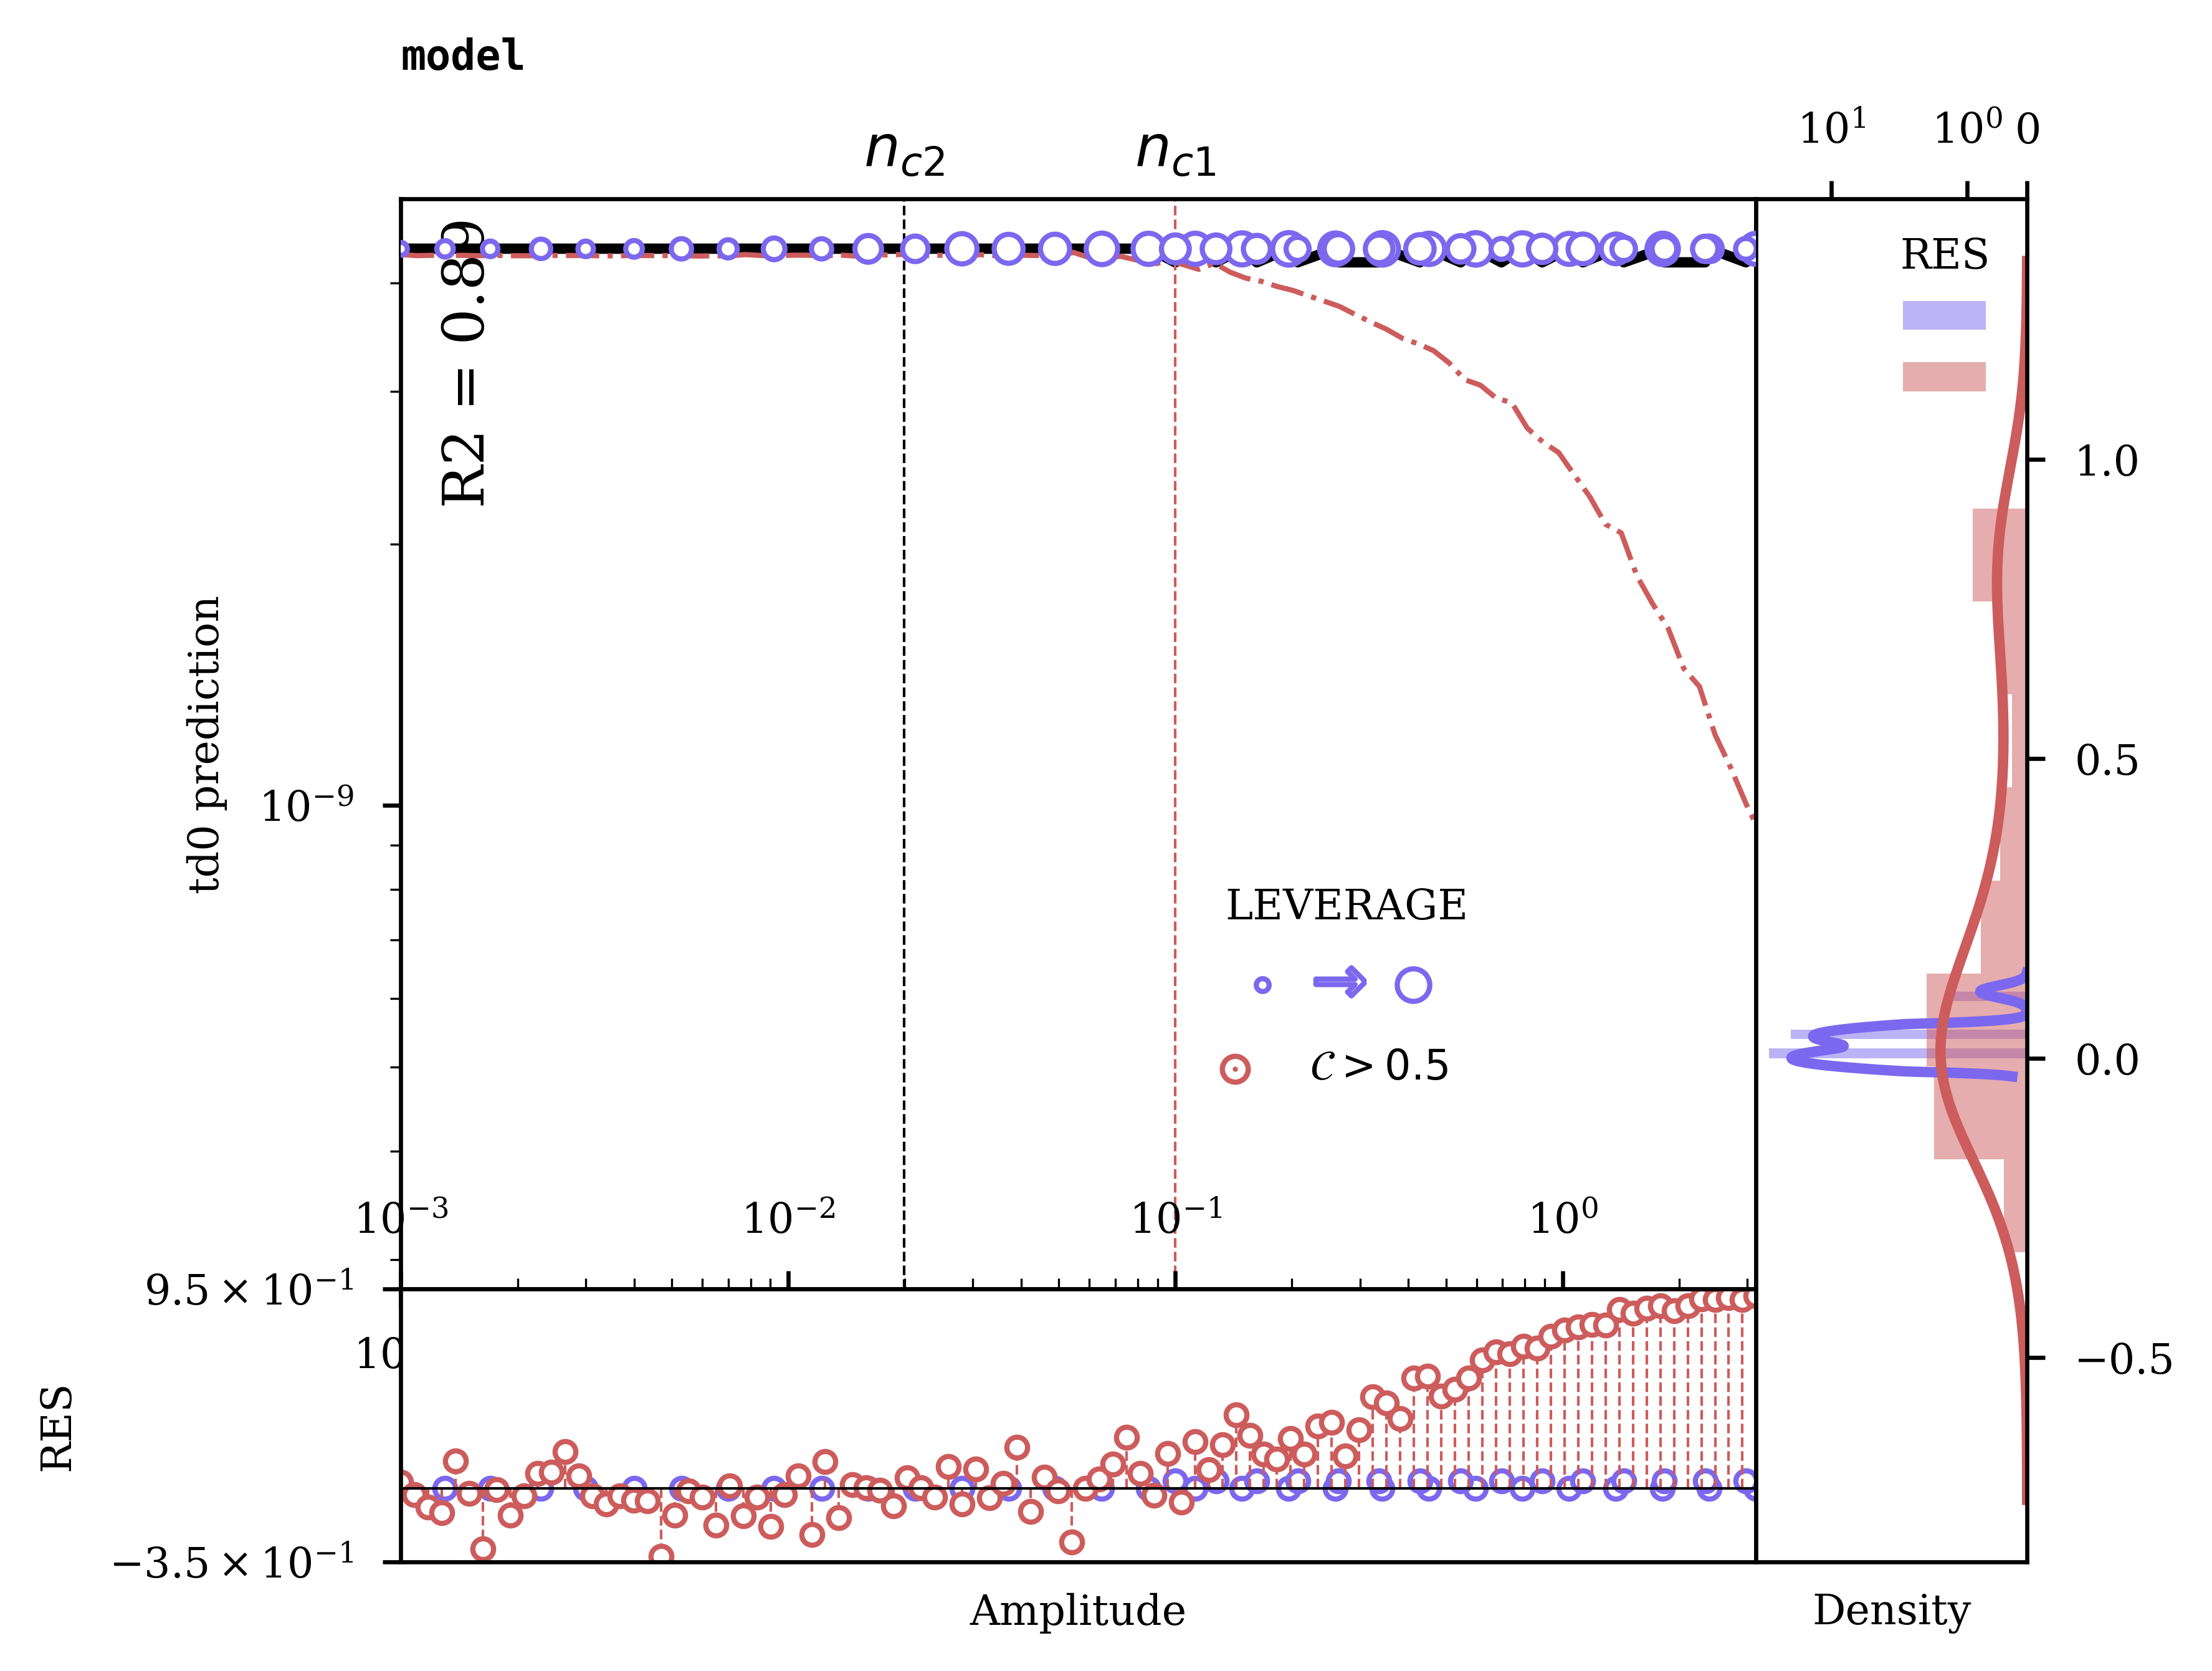

In [136]:
W = 5.8
i = 0
fig, ax = plt.subplots(1, figsize = (W,W * 3/4), layout = 'constrained')

ax.set_title('model',    fontweight='bold',loc = 'left',
family='monospace',)
ax.text(0.05, 0.85, f'R2 = {model.score(X_test, y_test):.2f}',va = 'center', ha = 'center', transform=ax.transAxes, fontsize = 11, rotation = 90)
Analysis = ax.plot(mesh['amp'],3.7 * mean2, color = 'indianred', lw = 1, ls = '-.', label = 'Analysis')
t = ax.yaxis.get_offset_text()
t.set_x(-0.3)
a2 = ax.inset_axes([0, -0.25, 1, 0.25], sharex=ax)

res = (pred_2d[:,0] - td_0 )/ td_0


Model = ax.scatter(np.exp(amp), pred_2d[:,0], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = markers[i], s = lev * 40, lw = 1, zorder = 8, label = 'Model')
a2.vlines(np.exp(amp), 0, res, color = 'mediumslateblue', lw = 0.5, ls = '--')
a2.plot(np.exp(amp), res, mfc = 'w', mec = 'mediumslateblue', lw = 0, marker = 'o', markersize = 4, markevery = 1)

ax.legend(loc = 'upper center', fontsize = 8,ncol = 2, frameon = False)

np.log(mesh['amp']) < np.log(0.1)
mask = [np.argmin(np.log(mesh['amp']) - amp[i]) for i in range(len(amp))]

res2 =  (results2['td0'] -  mean2['0']) / results2['td0']
a2.vlines(np.exp(results2['log-amp']), 0, res2, color = 'indianred', lw = 0.5, ls = '--')
a2.plot(np.exp(results2['log-amp']), res2, mfc = 'w', mec = 'indianred', lw = 0, marker = 'o', markersize = 4, markevery = 1)

a2.set_yscale('symlog')
ax.axvline(0.1, color = 'indianred', ls = '--', lw = .5)
ax.axvline(nc2, color = 'k', ls = '--', lw = .5)
sort = np.argsort(amp)
ax.plot(np.exp(amp)[sort],td_0[sort], color = 'k', lw = 2, ls = '-', zorder = 0)
ax.set_xlim(np.exp(amp).min(), np.exp(results2['log-amp']).max())

a2.set_xlabel('Amplitude')
ax.set_ylabel('td0 prediction')
ax.set_xlabel('Amplitude')
trans = ax.get_xaxis_transform()
# ax.fill_between(mesh['amp'], dn_theo.values.flatten(), mesh['amp'], color = 'mediumslateblue', alpha =.3)
ax.text(0.1, 1.03, '$n_{c1}$', transform = trans, fontsize = 11, ha = 'center')
ax.text(nc2, 1.03, '$n_{c2}$', transform = trans, fontsize = 11, ha = 'center')

mask = abs(res) - cook_distance(model, input_, np.exp(amp), 0.5) > 0
Cook = ax.scatter(np.exp(amp)[mask], pred_2d[:,0][mask], alpha = 1, fc = 'indianred', ec = 'indianred', marker = markers[i], s = lev[mask] * 80, lw = 5, zorder = 7, label = '$\mathcal{C} > 0.5$')
ax.legend(handles = [Cook] , loc = 'lower right', bbox_to_anchor=(0.8,0.15),fontsize = 8,ncol = 2, frameon = False)
a3 = ax.inset_axes([1, -.25, 0.2, 1.25])
a3.yaxis.tick_right()
a3.invert_xaxis()
a2.axhline(0, color = 'k', ls = '-', lw = .5)
a2.xaxis.tick_top()
a2.set_ylabel('RES')
# a2.set_yticks([-1, 0,1], labels=['-1', '0', '1'])
a2.set_ylim(-0.35,0.95)
s1 = ax.scatter([], [], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = markers[i], s = min(lev) * 40, lw = 1, zorder = 8, label = ' ')
s2 = ax.scatter([], [], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = r"$\rightarrow$", label = ' ',s = 100, lw = 1)
s3 = ax.scatter([], [], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = markers[i], s = max(lev) * 40, lw = 1, zorder = 8, label = ' ')
fig.legend(handles = [s1, s2, s3], loc = 'lower right', bbox_to_anchor=(0.7,0.36), fontsize = 11,ncol = 3, handletextpad = 0, columnspacing = -1, title = 'LEVERAGE', shadow = False, fancybox = False , frameon = False, title_fontsize = 8)
sns.histplot(y =abs(res),color = 'mediumslateblue', ax = a3,stat='density', fill=True, linewidth = 0, alpha = .5, label = ' ')
sns.kdeplot(y =abs(res), color='mediumslateblue', ax=a3, linewidth = 2)
a3.set_xscale('symlog')

sns.histplot(y =res2,color = 'indianred', ax = a3,stat='density', fill=True, linewidth = 0, alpha = .5, label = ' ')
sns.kdeplot(y =res2, color='indianred', ax=a3, linewidth = 2)
a3.legend(title = 'RES', title_fontsize = 8, frameon = False, handletextpad = -.3)
a3.xaxis.tick_top()
# a3.set_xscale('symlog')
ax.set_xscale('log')
ax.set_yscale('log')
i+= 1

In [ ]:
W = 5.8
i = 0
fig, ax = plt.subplots(1, figsize = (W,W * 3/4), layout = 'constrained')

ax.set_title('model',    fontweight='bold',loc = 'left',
family='monospace',)
ax.text(0.05, 0.85, f'R2 = {model.score(X_test, y_test):.2f}',va = 'center', ha = 'center', transform=ax.transAxes, fontsize = 11, rotation = 90)
Analysis = ax.plot(mesh['amp'], dn_theo, color = 'indianred', lw = 1, ls = '-.', label = 'Analysis')
t = ax.yaxis.get_offset_text()
t.set_x(-0.3)
a2 = ax.inset_axes([0, -0.25, 1, 0.25], sharex=ax)
res = (np.exp(pred_2d[:,1]) - np.exp(amp))  / np.exp(pred_2d[:,1])


Model = ax.scatter(np.exp(amp), np.exp(pred_2d[:,1]), alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = markers[i], s = lev * 40, lw = 1, zorder = 8, label = 'Model')
a2.vlines(np.exp(amp), 0, res, color = 'mediumslateblue', lw = 0.5, ls = '--')
a2.plot(np.exp(amp), res, mfc = 'w', mec = 'mediumslateblue', lw = 0, marker = 'o', markersize = 4, markevery = 1)

ax.legend(loc = 'upper center', fontsize = 8,ncol = 2, frameon = False)

np.log(mesh['amp']) < np.log(0.1)
mask = [np.argmin(np.log(mesh['amp']) - amp[i]) for i in range(len(amp))]

res2 =  np.log(dn_theo).to_numpy()[:,0][mask] - amp
a2.vlines(np.exp(amp), 0, res2, color = 'mediumslateblue', lw = 0.5, ls = '--')
a2.plot(np.exp(amp), res2, mfc = 'w', mec = 'indianred', lw = 0, marker = 'o', markersize = 4, markevery = 1)

a2.set_yscale('symlog')
ax.axvline(0.1, color = 'indianred', ls = '--', lw = .5)
ax.axvline(nc2, color = 'k', ls = '--', lw = .5)
ax.plot(np.exp(amp), np.exp(amp), color = 'k', lw = .5, ls = '-', zorder = 10)
ax.set_xlim(np.exp(amp).min(), np.exp(amp).max())
ax.set_ylim(np.exp(amp).min(), np.exp(amp).max())

a2.set_xlabel('log(Amplitude)')
ax.set_ylabel('Amplitude prediction')
ax.set_xlabel('Amplitude')
trans = ax.get_xaxis_transform()
ax.fill_between(mesh['amp'], dn_theo.values.flatten(), mesh['amp'], color = 'mediumslateblue', alpha =.3)
ax.text(0.1, 1.03, '$n_{c1}$', transform = trans, fontsize = 11, ha = 'center')
ax.text(nc2, 1.03, '$n_{c2}$', transform = trans, fontsize = 11, ha = 'center')

mask = abs(res) - cook_distance(model, input_, np.exp(amp), 0.5) > 0
# Cook = ax.scatter(np.exp(amp)[mask], pred_2d[:,1][mask], alpha = 1, fc = 'indianred', ec = 'indianred', marker = markers[i], s = lev[mask] * 80, lw = 5, zorder = 7, label = '$\mathcal{C} > 0.5$')
# ax.legend(handles = [Cook] , loc = 'lower right', bbox_to_anchor=(0.8,0.15),fontsize = 8,ncol = 2, frameon = False)
a3 = ax.inset_axes([1, -.25, 0.2, 1.25])
a3.yaxis.tick_right()
a3.invert_xaxis()
a2.axhline(0, color = 'k', ls = '-', lw = .5)
a2.xaxis.tick_top()
a2.set_ylabel('RES')
a2.set_yticks([-1, 0,1], labels=['-1', '0', '1'])
# a2.set_ylim(-2.5,0.5)
s1 = ax.scatter([], [], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = markers[i], s = min(lev) * 40, lw = 1, zorder = 8, label = ' ')
s2 = ax.scatter([], [], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = r"$\rightarrow$", label = ' ',s = 100, lw = 1)
s3 = ax.scatter([], [], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = markers[i], s = max(lev) * 40, lw = 1, zorder = 8, label = ' ')
fig.legend(handles = [s1, s2, s3], loc = 'lower right', bbox_to_anchor=(0.7,0.36), fontsize = 11,ncol = 3, handletextpad = 0, columnspacing = -1, title = 'LEVERAGE', shadow = False, fancybox = False , frameon = False, title_fontsize = 8)
res = res[abs(res)<10]
sns.histplot(y =res,color = 'mediumslateblue', ax = a3,stat='density', fill=True, linewidth = 0, alpha = .5, label = ' ')
sns.kdeplot(y =res, color='mediumslateblue', ax=a3, linewidth = 2)
a3.set_xscale('symlog')

sns.histplot(y =res2,color = 'indianred', ax = a3,stat='density', fill=True, linewidth = 0, alpha = .5, label = ' ')
sns.kdeplot(y =res2, color='indianred', ax=a3, linewidth = 2)
a3.legend(title = 'RES', title_fontsize = 8, frameon = False, handletextpad = -.3)
a3.xaxis.tick_top()
# a3.set_ylim(-10,10)
# a3.set_xscale('symlog')
ax.set_xscale('log')
ax.set_yscale('log')
i+= 1

In [199]:
original_X_test = pd.DataFrame(scaler.inverse_transform(X_test), columns = X_test.columns)
L = original_X_test['L']
lcx = original_X_test['lcx']


In [146]:
original_X_test.to_csv('original_X_test.csv')

In [148]:
from scipy.stats import t

In [200]:
def calculate_CI(y_true, y_pred, x, alpha = 0.05) :
    n = len(y_true)
    std = np.std((y_true - y_pred))
    t_star= t.ppf(1 - alpha, n - 2)
    print(t_star)
    CI = t_star * std * np.sqrt(1 + 1/n + (x - x.mean())**2 / ((n - 1) * np.std(x)**2))
    return CI


In [201]:
original_X_test['R']

0      0.001000
1      0.315623
2      0.376545
3      0.441324
4      0.339117
         ...   
318    1.000000
319    4.000000
320    4.000000
321    0.328232
322    1.000000
Name: R, Length: 323, dtype: float64

NameError: name 'nc2' is not defined

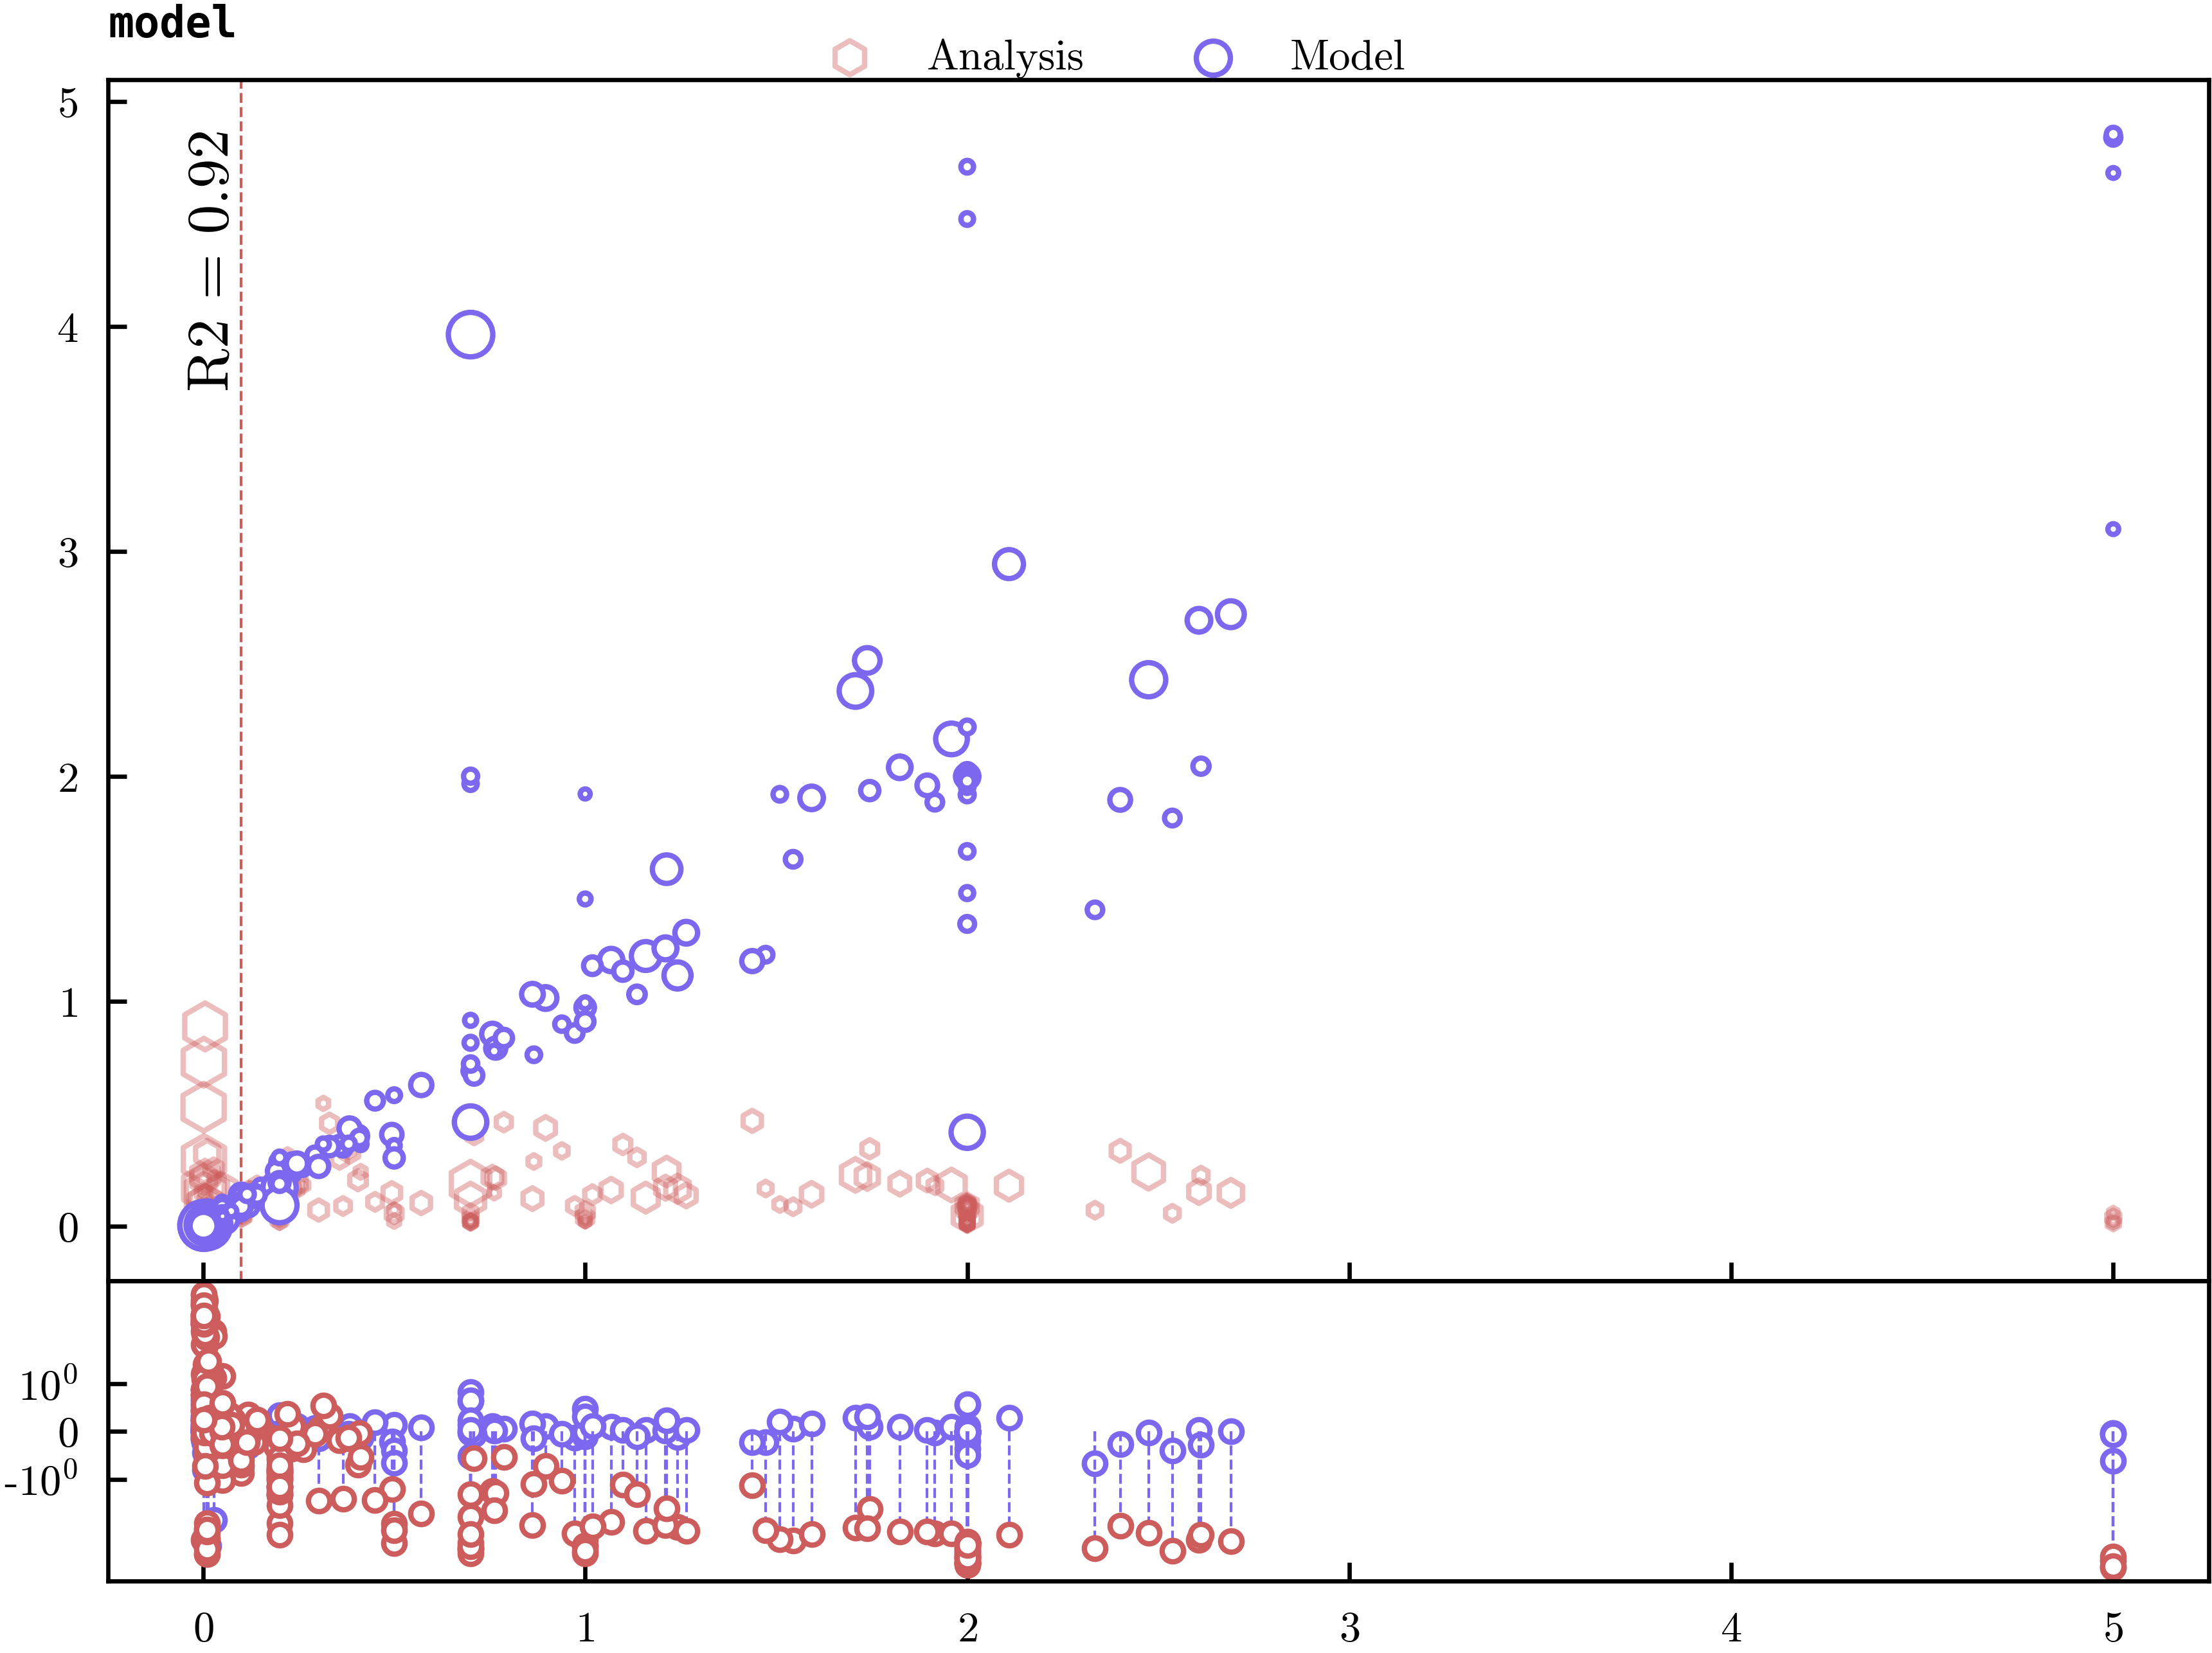

In [202]:
W = 5.8
i = 0
fig, ax = plt.subplots(1, figsize = (W,W * 3/4), layout = 'constrained')

ax.set_title('model',    fontweight='bold',loc = 'left',
family='monospace',)
amp = np.array(y_test['amplitude'])


dn_theo = original_X_test['std_delays'] * 3e8 / (4 * L/ np.cos(np.deg2rad(original_X_test['teta']))) * np.sqrt(lcx/L)
lev, cd = cook_distance(model, X_test, np.exp(amp), 0.5)

ax.text(0.05, 0.85, f'R2 = {model.score(X_test, y_test):.2f}',va = 'center', ha = 'center', transform=ax.transAxes, fontsize = 11, rotation = 90)
Analysis = ax.scatter(np.exp(amp), dn_theo, color = 'indianred', lw = 1, label = 'Analysis', s = lev * 80, facecolors='none', edgecolors='indianred', marker = 'h', alpha = .4)
offset = ax.yaxis.get_offset_text()
offset.set_x(-0.3)
a2 = ax.inset_axes([0, -0.25, 1, 0.25], sharex=ax)
pred_2d = model.predict(X_test)
res = (np.exp(pred_2d[:,1]) - np.exp(amp))  / np.exp(pred_2d[:,1])


Model = ax.scatter(np.exp(amp), np.exp(pred_2d[:,1]), alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = markers[i], s = lev * 80, lw = 1, zorder = 8, label = 'Model')
fig.legend(loc = 'upper center', fontsize = 8,ncol = 2, frameon = False)

a2.vlines(np.exp(amp), 0, res, color = 'mediumslateblue', lw = 0.5, ls = '--')
a2.plot(np.exp(amp), res, mfc = 'w', mec = 'mediumslateblue', lw = 0, marker = 'o', markersize = 4, markevery = 1)


res2 =  np.log(dn_theo) - amp
a2.vlines(np.exp(amp), 0, res2, color = 'mediumslateblue', lw = 0.5, ls = '--')
a2.plot(np.exp(amp), res2, mfc = 'w', mec = 'indianred', lw = 0, marker = 'o', markersize = 4, markevery = 1)

a2.set_yscale('symlog')
ax.axvline(0.1, color = 'indianred', ls = '--', lw = .5)
ax.axvline(nc2, color = 'k', ls = '--', lw = .5)
ax.plot(np.exp(amp), np.exp(amp), color = 'k', lw = .5, ls = '-', zorder = 10)
ax.set_xlim(np.exp(amp).min(), np.exp(amp).max())
ax.set_ylim(np.exp(amp).min(), np.exp(amp).max())

a2.set_xlabel('log(Amplitude)')
ax.set_ylabel('Amplitude prediction')
ax.set_xlabel('Amplitude')
trans = ax.get_xaxis_transform()
# ax.fill_between(amp, dn_theo.values.flatten(), amp, color = 'mediumslateblue', alpha =.3)
ax.text(0.1, 1.03, '$n_{c1}$', transform = trans, fontsize = 11, ha = 'center')
ax.text(nc2, 1.03, '$n_{c2}$', transform = trans, fontsize = 11, ha = 'center')

mask = abs(res) - cd > 0
Cook = ax.scatter(np.exp(amp)[mask], pred_2d[:,1][mask], alpha = 1, fc = 'indianred', ec = 'indianred', marker = markers[i], s = lev[mask] * 80, lw = 5, zorder = 7, label = '$\mathcal{C} > 0.5$')
ax.legend(handles = [Cook] , loc = 'lower right', bbox_to_anchor=(0.8,0.15),fontsize = 8,ncol = 2, frameon = False)
a3 = ax.inset_axes([1, -.25, 0.2, 1.25])
a3.yaxis.tick_right()
a3.invert_xaxis()
a2.axhline(0, color = 'k', ls = '-', lw = .5)
a2.xaxis.tick_top()
a2.set_ylabel('RES')
a2.set_yticks([-1, 0,1], labels=['-1', '0', '1'])
# a2.set_ylim(-2.5,0.5)
s1 = ax.scatter([], [], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = markers[i], s = min(lev) * 40, lw = 1, zorder = 8, label = ' ')
s2 = ax.scatter([], [], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = r"$\rightarrow$", label = ' ',s = 100, lw = 1)
s3 = ax.scatter([], [], alpha = 1, fc = 'w', ec = 'mediumslateblue', marker = markers[i], s = max(lev) * 40, lw = 1, zorder = 8, label = ' ')
fig.legend(handles = [s1, s2, s3], loc = 'lower right', bbox_to_anchor=(0.7,0.36), fontsize = 11,ncol = 3, handletextpad = 0, columnspacing = -1, title = 'LEVERAGE', shadow = False, fancybox = False , frameon = False, title_fontsize = 8)
res = res[abs(res)<10]
# sns.histplot(y =res,color = 'mediumslateblue', ax = a3,stat='density', fill=True, linewidth = 0, alpha = .5, label = ' ')
sns.kdeplot(y =res, color='mediumslateblue', ax=a3, linewidth = 2, cumulative=True, fill = True)
a3.set_xscale('symlog')
index_sort = np.argsort(amp)
CI = calculate_CI(amp[index_sort], pred_2d[:,1][index_sort], amp[index_sort])
ax.fill_between(np.exp(amp[index_sort]), np.exp(amp[index_sort] - CI), np.exp(amp[index_sort] + CI), color = 'mediumslateblue', alpha = .4)
# sns.histplot(y =res2,color = 'indianred', ax = a3,stat='density', fill=True, linewidth = 0, alpha = .5, label = ' ')

mask = dn_theo >  0
dn_theo = np.array(dn_theo)
index_sort = np.argsort(amp[mask])

sns.kdeplot(y =res2, color='indianred', ax=a3, linewidth = 2, cumulative=True, fill = True)
a3.set_ylim(-10,10)
a3.legend(title = 'RES', title_fontsize = 8, frameon = False, handletextpad = -.3)
a3.xaxis.tick_top()
a3.set_xlabel('CDF')
# a3.set_ylim(-10,10)
# a3.set_xscale('symlog')
ax.set_xscale('log')
ax.set_yscale('log')

In [159]:
(original_X_test['std_delays'] > 1e-11).sum()

291

In [701]:
y_pred = model.predict(X_test)[:,1]

In [702]:
y_test = y_test.loc[X_test.index]

In [208]:
params_list = ['R', 'L', 'lcx', 'lcy', 'teta']

NameError: name 'y_pred' is not defined

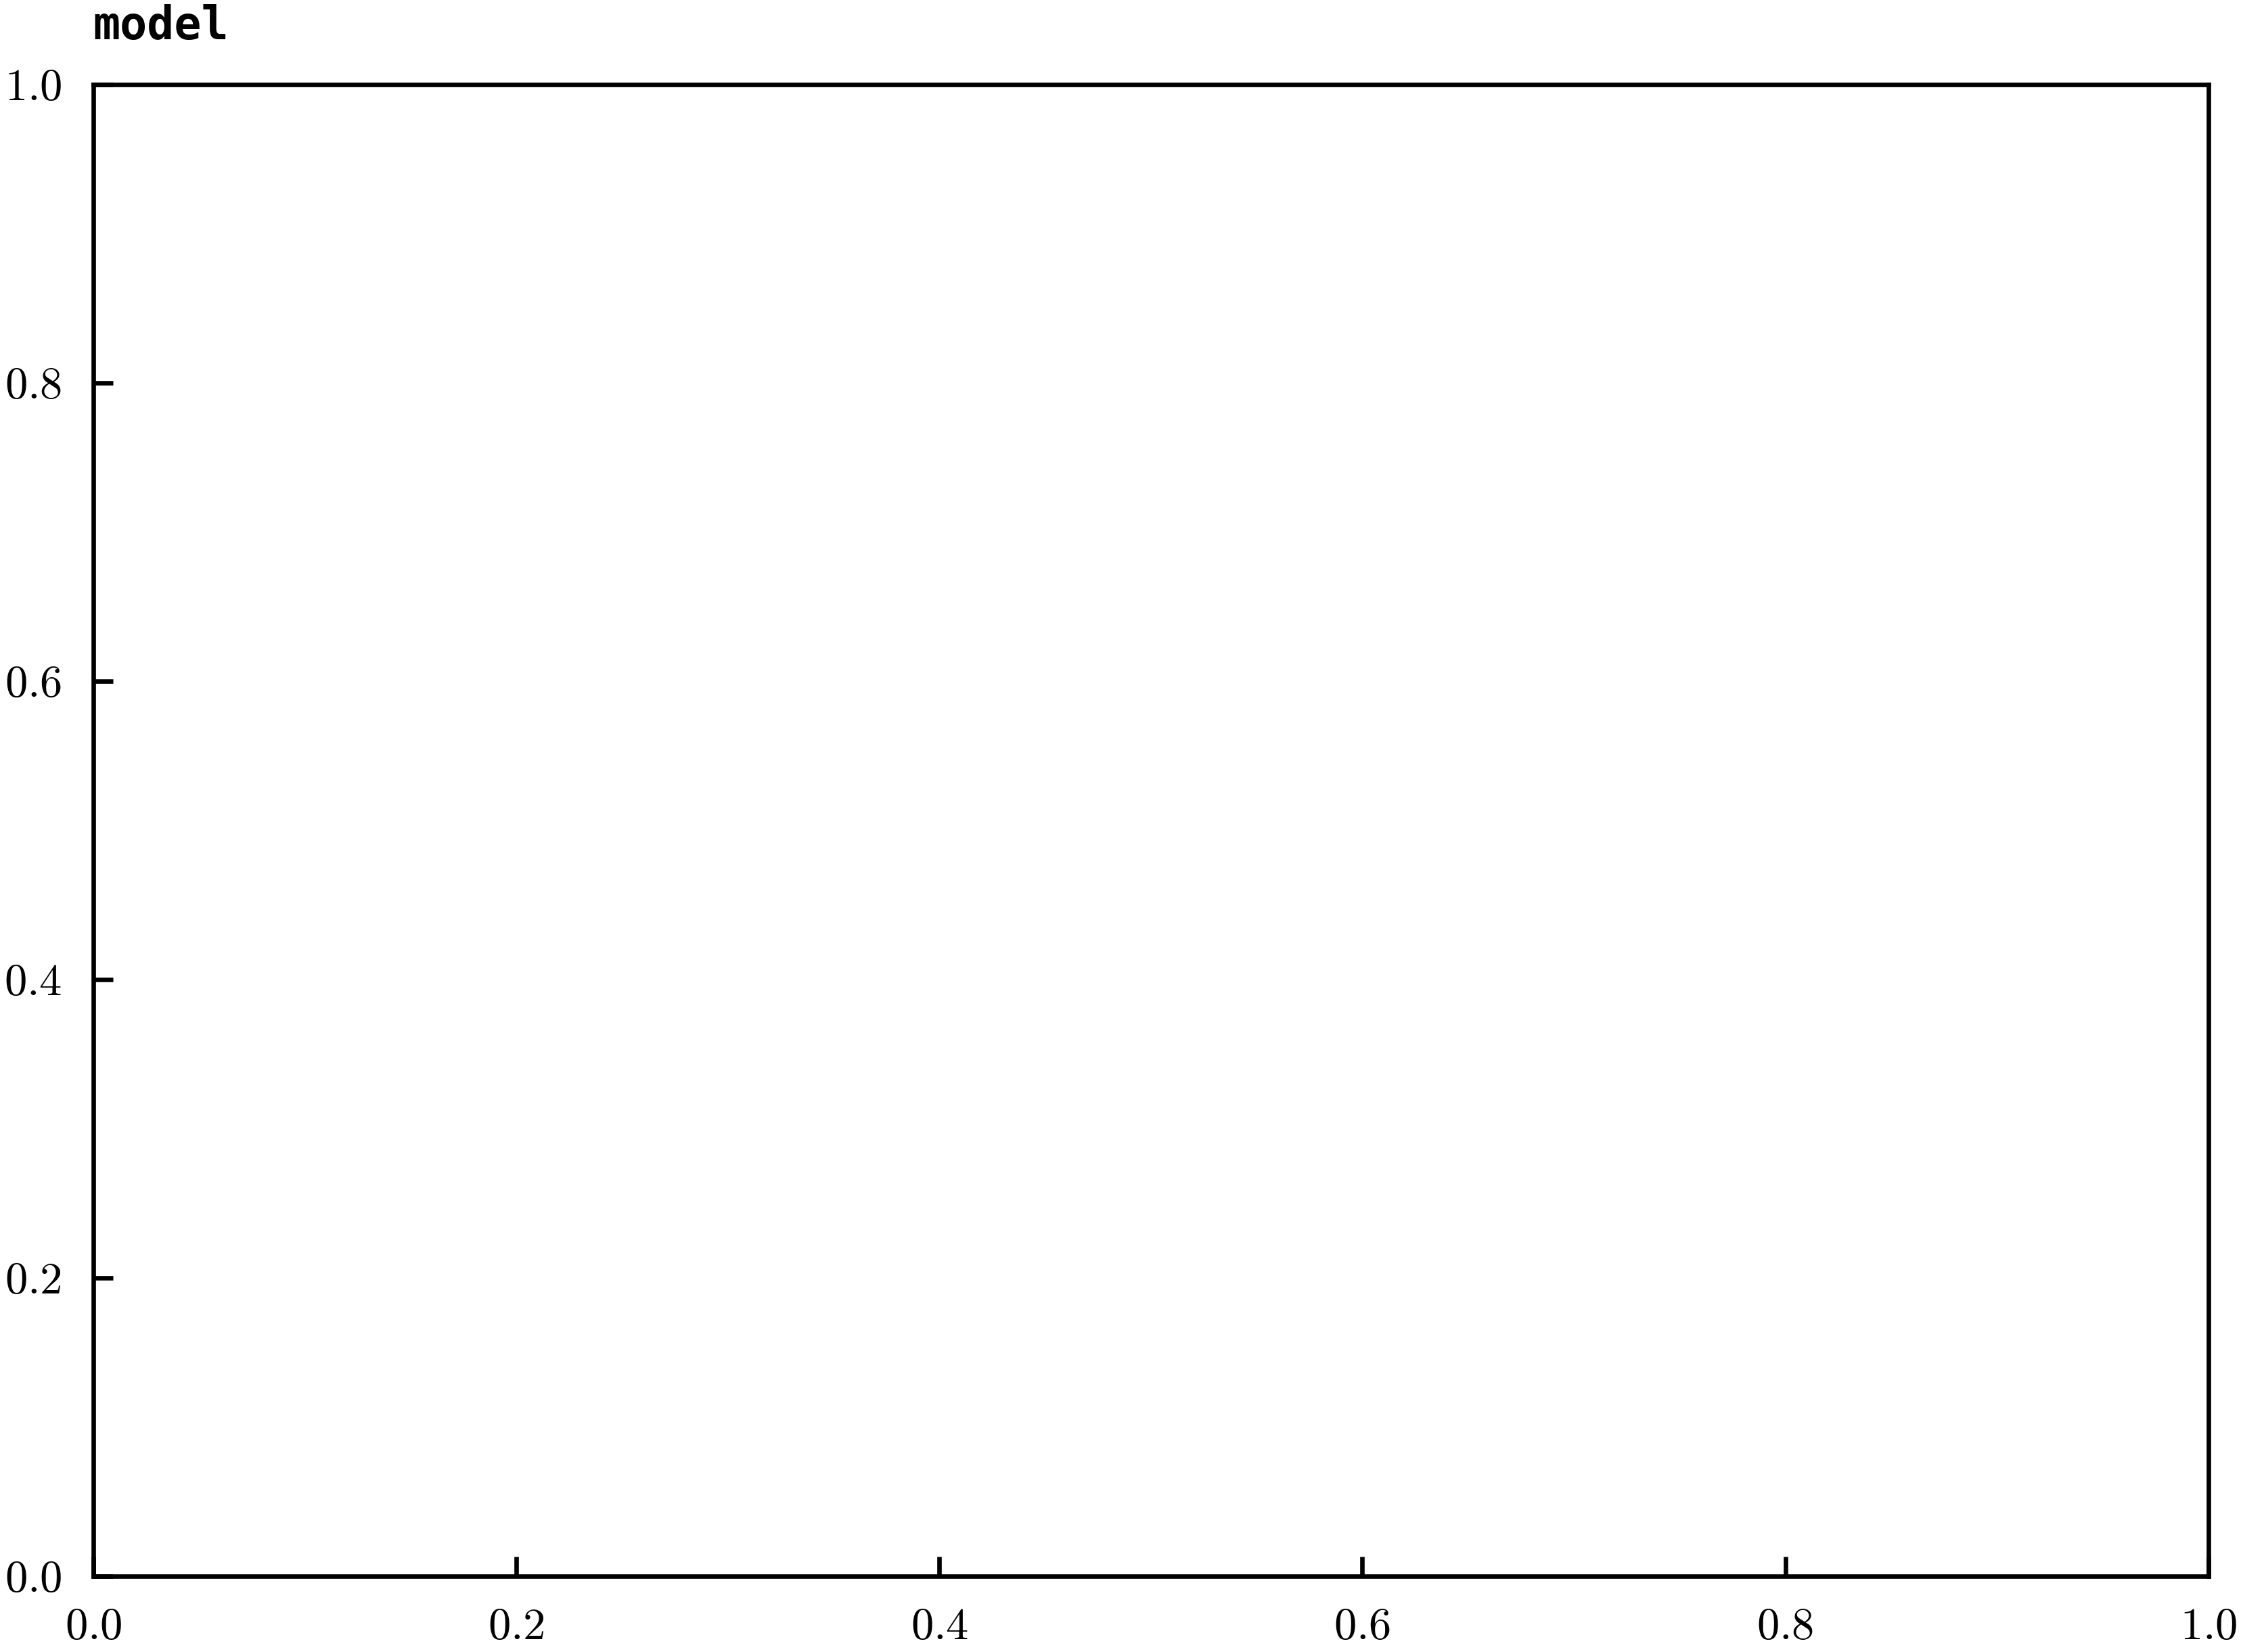

In [90]:
W = 5.8
fig, ax = plt.subplots(1, figsize = (W,W * 3/4), layout = 'tight')
ax.set_title('model',    fontweight='bold',loc = 'left',
family='monospace',)

res = abs((np.exp(y_test['amplitude']) - np.exp(y_pred))  / np.exp(y_test['amplitude']))

X_plot = X_test.copy()
X_plot['res'] = res

R = np.unique(scaler.inverse_transform(X_test)[:,10])


L = np.unique(scaler.inverse_transform(X_test)[:,9])

lcx = np.unique(scaler.inverse_transform(X_test)[:,0])

lcy = np.unique(scaler.inverse_transform(X_test)[:,1])

teta = np.unique(scaler.inverse_transform(X_test)[:,11])

params = [R, L, lcx, lcy, teta]
ax.bar(np.arange(5), [X_plot.groupby(p).mean()['res'].mean() for p in params_list], width = 0.7, color = ['mediumslateblue', 'indianred', 'mediumslateblue', 'indianred'], alpha = 0.5, label = 'Mean',)
colors = ['mediumslateblue', 'indianred', 'mediumslateblue', 'indianred', 'mediumslateblue']
for i, p in enumerate(params_list) :
    n = len(X_plot.groupby(p).mean()['res'])

    ax.scatter(np.ones(n) * i, X_plot.groupby(p).mean()['res'], color =  colors[i], ec = 'k', lw = 1, zorder = 9)
    scaled =  params[i]* (X_plot.groupby(p).mean()['res'].max() )/ params[i].max()
    ax.vlines(i + 0.35, 0, X_plot.groupby(p).mean()['res'].max() + 0.1, color = 'k', lw = 2)
    ax.scatter(np.ones(n) * (i + 0.35), scaled, ec= 'k', fc = 'w', lw = 1, s = 20, marker = 'o', zorder = 10)
    ax.hlines(X_plot.groupby(p).mean()['res'].max() + 0.1, i + 0.25, i + 0.45, color = 'k', lw = 2)
    ax.text(i + 0.35, X_plot.groupby(p).mean()['res'].max() + 0.11, p, ha = 'center', va = 'bottom', fontsize = 8, fontfamily = 'monospace', fontweight = 'bold')


    for j in range(n) :
        ax.plot([i, i + 0.35], [X_plot.groupby(p).mean()['res'].iloc[j], scaled[j]], color = 'k', lw = .5, zorder = 8, ls = ':')
        ticks_plot = np.linspace(0,params[i].max(), 10)
        ticks =  ticks_plot * (X_plot.groupby(p).mean()['res'].max())/ params[i].max()

        ax.hlines(ticks, i + 0.32, i + 0.38, color = 'k', lw = 1, ls = '-')
        for k, t in enumerate(ticks[1:]) :
            ax.text(i + 0.4, t, f'{ticks_plot[k + 1]:.1e}', ha = 'left', va = 'center', fontsize = 5, fontfamily = 'monospace', fontweight = 'bold', rotation = 45)
ax.set_ylim(0,15)
ax.set_ylabel('residuals')
ax.set_xticks(np.arange(5), labels = params_list)
ax.set_yscale('symlog')
ax.text


In [143]:
from sklearn.utils.fixes import loguniform

In [145]:
import matplotlib as mpl

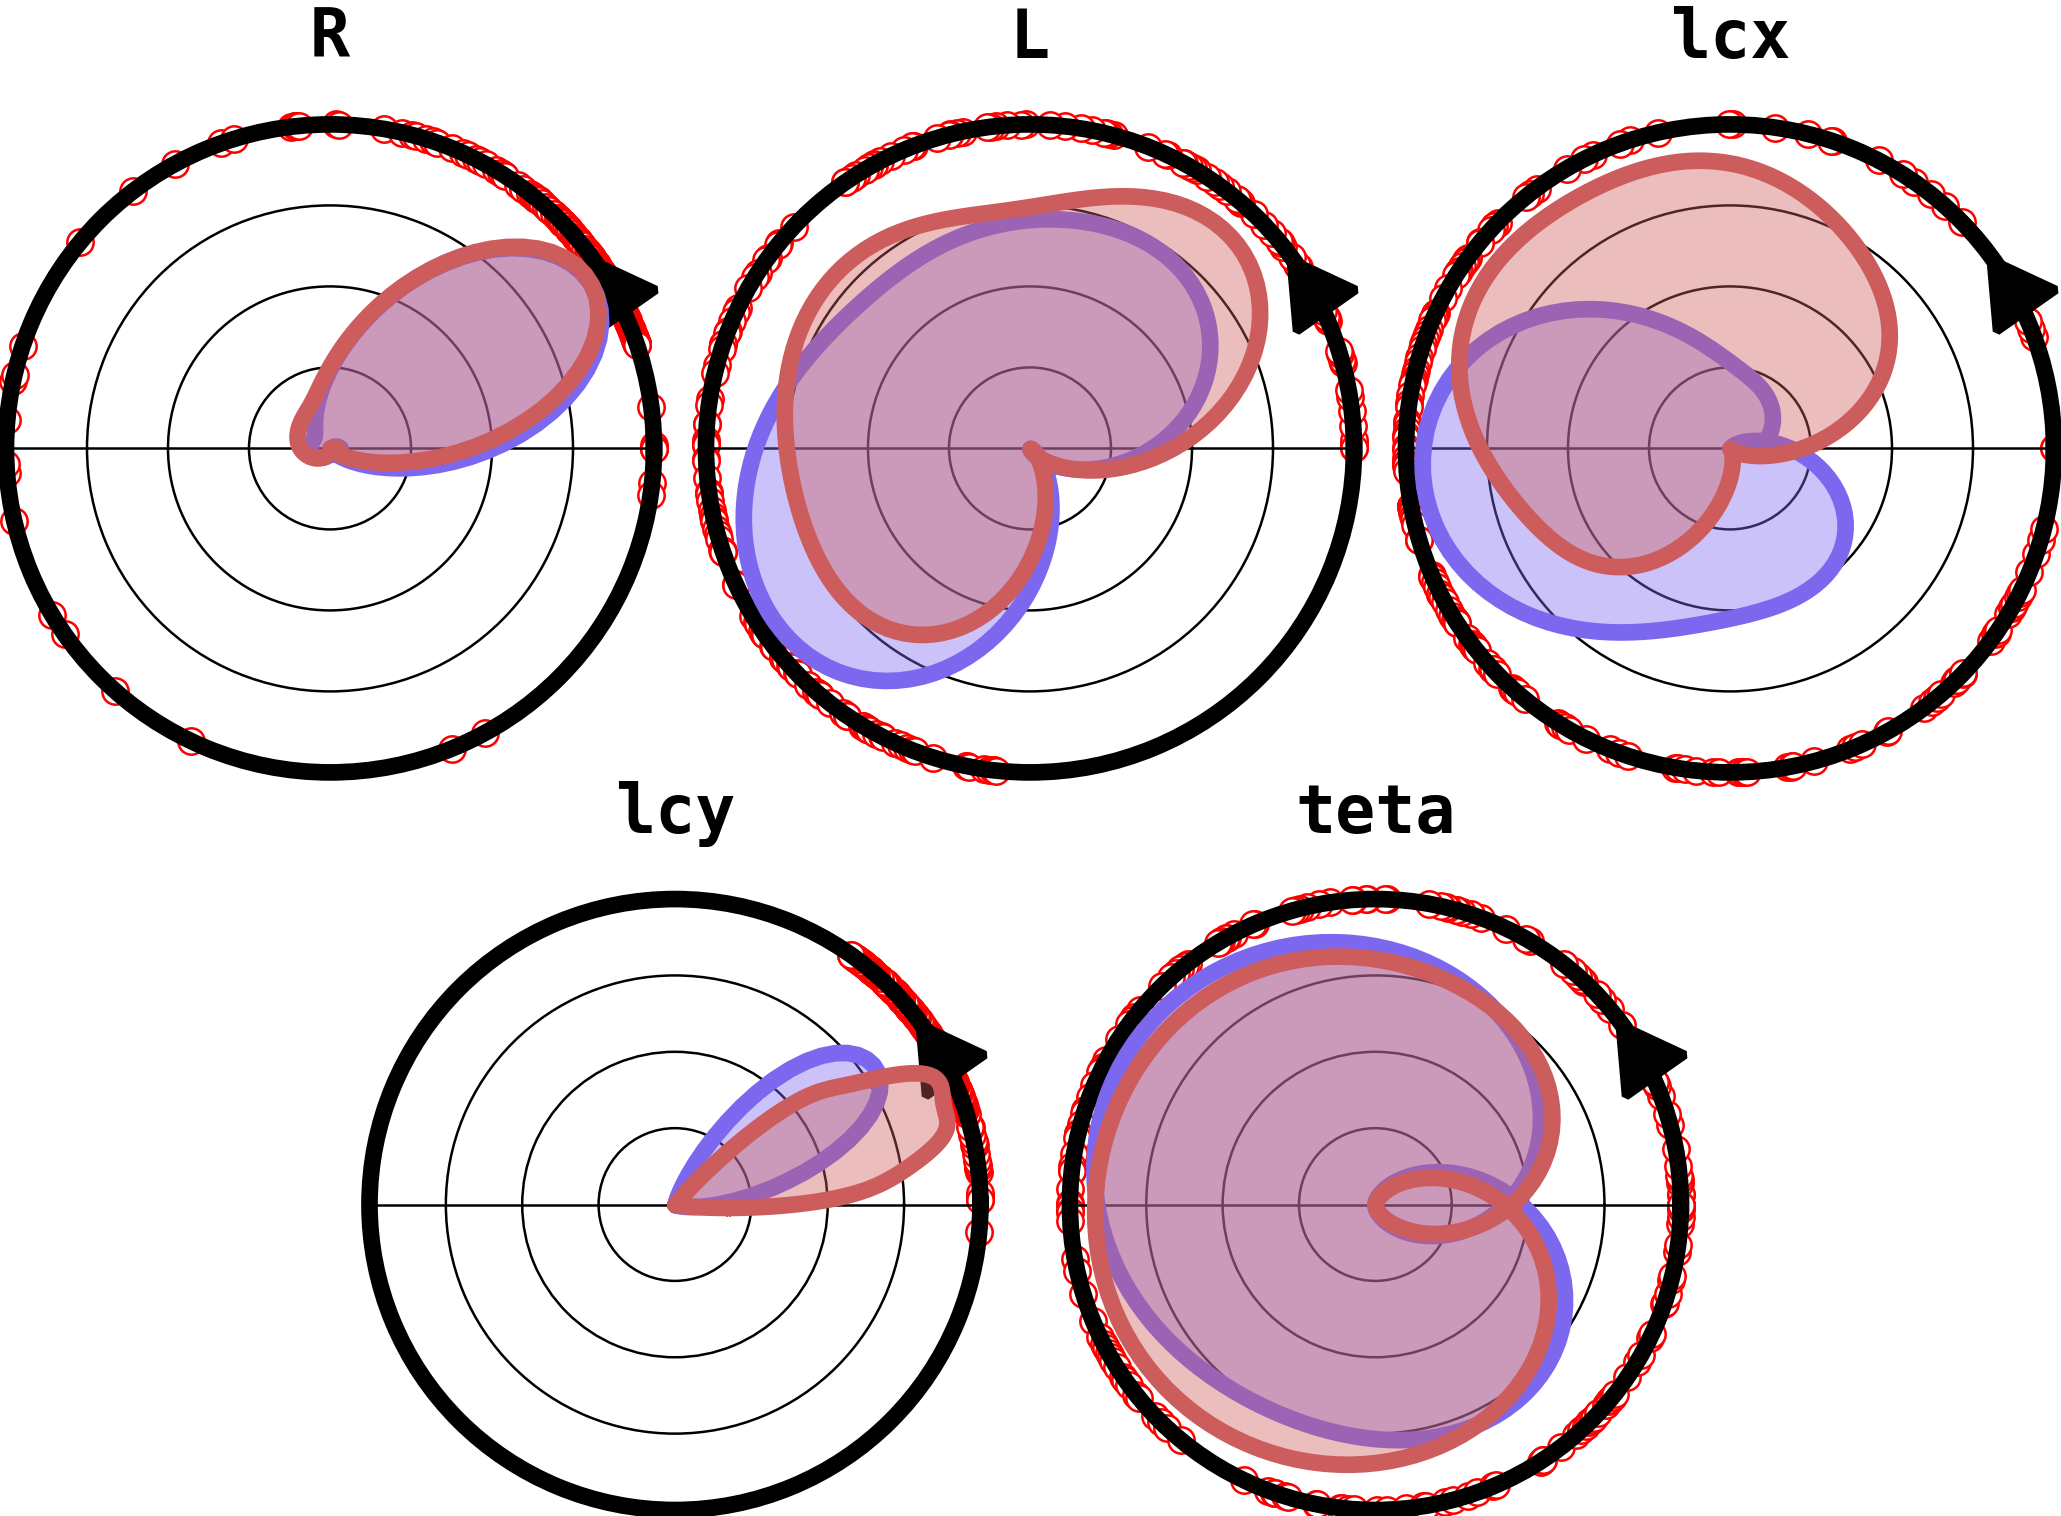

In [136]:
W = 3.5
fig, axes = plt.subplots(2,3, figsize = (W,W * 6/4), layout = 'constrained', subplot_kw={'projection': 'polar'})
axes = axes.flatten()
axes[-1].remove()
# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.



# res = abs((np.exp(y_test['amplitude']) - np.exp(y_pred))  / np.exp(y_test['amplitude']))
params_list = ['R', 'L', 'lcx', 'lcy', 'teta']
X_plot = X_test.copy()
# X_plot['res'] = res

R = 1/np.unique(scaler.inverse_transform(X_test)[:,10])


L = np.unique(scaler.inverse_transform(X_test)[:,9])

lcx = np.unique(scaler.inverse_transform(X_test)[:,0])

lcy = np.unique(scaler.inverse_transform(X_test)[:,1])

teta = np.unique(scaler.inverse_transform(X_test)[:,11])

params = [R, L, lcx, lcy, teta]

params_2 = np.array([1/df_metrics9['R'], df_metrics9['L'], df_metrics9['lcx'], df_metrics9['lcy'], df_metrics9['teta']])
for i, ax in enumerate(axes[:-1]) :

    params_total = np.concatenate([np.array(params[i]),params_2[i]])
    angles_1= (params[i] - params_total.min()) * 2 * np.pi / params_total.max()
    angles_2 = (params_2[i] - params_total.min()) * 2 * np.pi / params_total.max()
    angles_total = np.sort(np.concatenate([angles_1, angles_2]))
    angles_1 = np.concatenate((angles_1,[angles_1[0]]))
    angles_2 = np.concatenate((angles_2,[angles_2[0]]))

    sns.kdeplot(x = angles_1,  ax = ax, color = 'mediumslateblue', alpha = 0.4, fill=True, linewidth = 2, label = ' ',zorder = 10)
    sns.kdeplot(x = angles_2,  ax = ax, color = 'indianred', alpha = 0.4, fill=True, linewidth = 2, label = ' ',zorder = 10)
    ax.set_title(params_list[i], family = 'monospace', fontweight = 'bold')
    ymin, ymax = ax.get_ylim()
    # ax.set_rscale('symlog')

    ax.set_rticks( np.linspace(0,ymax, 5), color = 'k', labels = [' '] + [' ' for i in np.linspace(0,1,3)] + [' '])
    ax.set_rlim(ymin, ymax)
    ax.set_xticklabels([])
    ax.set_xticks([angles_total[0], np.pi], labels = [f'{params_total[i].min():.1e}', f'{params_total[i].max() * np.pi /(2 * np.pi) + params_total[i].min():.0e}'])
    ax.set_ylabel('')
    ax.grid(axis = 'both', color = 'k', lw = .3, zorder = 0, ls = '-')
    ax.spines['polar'].set_linewidth(2)
    ax.plot(0.5, 1, marker = (3,1,35), transform=ax.get_xaxis_transform(), clip_on=False, color = 'k', markersize = 10)
    # ax.plot(angles, values, color = 'mediumslateblue',  lw = 1, label = 'Mean')\
    ax.scatter(angles_1, np.ones(len(angles_1)) * ymax, ec = 'r', s = 10, fc = 'w', lw = .3, zorder = 0, clip_on = False)
    ax.set_xticklabels([])
    pos = axes[-3].get_position()
    axes[-3].set_position([pos.x0 + 0.012, pos.y0 + 0.04, pos.width * 1.05, pos.height * 1.05])
    pos = axes[-2].get_position()
    axes[-2].set_position([pos.x0 + 0.024, pos.y0 + 0.04, pos.width * 1.05, pos.height * 1.05])
    plt.savefig('../figure/polar_param.pdf', dpi = 600, bbox_inches = 'tight')

In [143]:
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import BSpline, make_interp_spline, interp1d


In [213]:
yhat = savgol_filter(values_2[:-1],21, 5)

In [230]:
params_2.shape

(5, 200)

In [270]:
res2.mean()

0.5592370373511939

In [276]:
params_1[0]

(array([1.00000000e-03, 1.00000000e-02, 1.00000000e-01, 2.50625420e-01,
        2.51935121e-01, 2.52333074e-01, 2.53883392e-01, 2.54335656e-01,
        2.55070876e-01, 2.55353410e-01, 2.57225996e-01, 2.60122713e-01,
        2.62021358e-01, 2.63248729e-01, 2.63530505e-01, 2.64603326e-01,
        2.65293714e-01, 2.67862627e-01, 2.71013039e-01, 2.71313449e-01,
        2.71336486e-01, 2.72273640e-01, 2.72582721e-01, 2.73496011e-01,
        2.73714468e-01, 2.75644250e-01, 2.78188925e-01, 2.82244884e-01,
        2.86051476e-01, 2.87491559e-01, 2.89618109e-01, 2.90061661e-01,
        2.90710459e-01, 2.91000411e-01, 2.91077480e-01, 2.97546808e-01,
        3.01352588e-01, 3.02449699e-01, 3.08160858e-01, 3.08955122e-01,
        3.09636596e-01, 3.12971404e-01, 3.14516661e-01, 3.15623392e-01,
        3.16607035e-01, 3.17167687e-01, 3.20182559e-01, 3.20432607e-01,
        3.20625522e-01, 3.20965500e-01, 3.21560067e-01, 3.21974798e-01,
        3.27113399e-01, 3.28232195e-01, 3.39117345e-01, 3.452104

In [280]:
params_total[0]

0.0

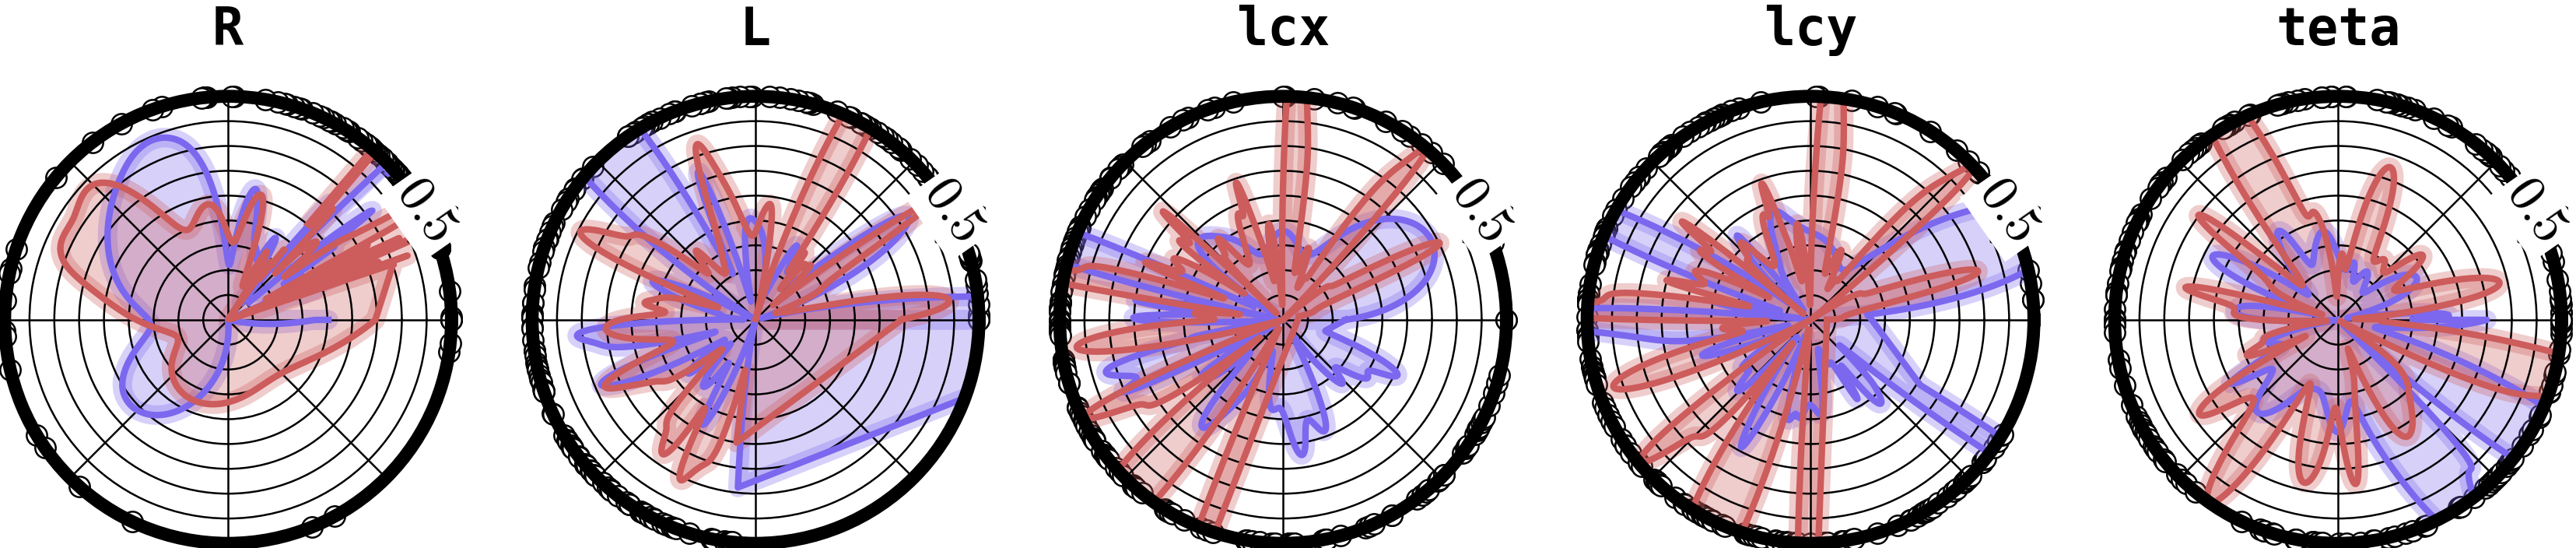

In [296]:
W = 5.8
fig, axes = plt.subplots(1,5, figsize = (W,W * 3/4), layout = 'tight', subplot_kw={'projection': 'polar'})


# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
pred_power = model.predict(power_data_rescaled)
res = abs((np.exp(pred_2d[:,1]) - np.exp(amp))  / np.exp(pred_2d[:,1]))

amp2 = df_metrics9['amplitude']
res2 = abs((np.exp(pred_power[:,1]) - np.exp(amp2))  / np.exp(amp2))
original_X_test['res'] = abs(res)
df_metrics9['res2'] = abs(res2)


R = np.unique(scaler.inverse_transform(X_test)[:,10])


L = np.unique(scaler.inverse_transform(X_test)[:,9])

lcx = np.unique(scaler.inverse_transform(X_test)[:,0])

lcy = np.unique(scaler.inverse_transform(X_test)[:,1])

teta = np.unique(scaler.inverse_transform(X_test)[:,11])

params_1 = [R, L, lcx, lcy, teta]
params_2 = np.array([1/df_metrics9['R'], df_metrics9['L'], df_metrics9['lcx'], df_metrics9['lcy'], df_metrics9['teta']])
params_2 = np.array([np.unique(p) for p in params_2])

for i, ax in enumerate(axes) :

    params_total = np.concatenate([params_1[i],params_2[i]])

    angles_1= (params_1[i] - params_total.min()) * 2 * np.pi / params_total.max()
    angles_1 = np.concatenate((angles_1,[angles_1[0]]))
    values = np.array(original_X_test.groupby(params_list[i]).mean()['res'])
    values = np.concatenate((values,[values[0]]))

    angles_2= (params_2[i] - params_total.min()) * 2 * np.pi / params_total.max()
    angles_2 = np.concatenate((angles_2,[angles_2[0]]))
    values_2 = np.array(df_metrics9.groupby(params_list[i]).mean()['res2'])
    values_2 = np.concatenate((values_2,[values_2[0]]))

    if params_list[i] == 'lcy' :
        params_1[i] = params_1[i][:-1]
        params_total = np.concatenate([params_1[i],params_2[i]])
        angles_1= (params_1[i] - params_total.min()) * 2 * np.pi / params_total.max()
        angles_1 = np.concatenate((angles_1,[angles_1[0]]))
        values = np.array(original_X_test.groupby(params_list[i]).mean()['res'])
        values = np.concatenate((values,[values[0]]))

        angles_2= (params_2[i] - params_total.min()) * 2 * np.pi / params_total.max()
        angles_2 = np.concatenate((angles_2,[angles_2[0]]))
        values_2 = np.array(df_metrics9.groupby(params_list[i]).mean()['res2'])
        values_2 = np.concatenate((values_2,[values_2[0]]))

    ax.set_title(params_list[i], family = 'monospace', fontweight = 'bold')

    yhat = savgol_filter(values[:-1],21, 5)
    yhat = np.concatenate((yhat,[yhat[0]]))
    b = make_interp_spline(angles_1[:-1:3], yhat[:-1:3])
    x_p = np.linspace(angles_1.min(), angles_1.max(), 1000)
    ymin, ymax = ax.get_ylim()
    x,y = np.concatenate((x_p,[x_p[0]])), np.concatenate((b(x_p),[b(x_p[0])]))
    ax.fill_between(x,y,  color = 'mediumslateblue',  lw = 3, label = 'Mean', alpha = 0.3, )
    ax.plot(x,y, color = 'mediumslateblue', lw = 1, ls = '-', label = 'Mean')

    yhat = savgol_filter(values_2[:-1],21, 5)
    yhat = np.concatenate((yhat,[yhat[0]]))
    b = make_interp_spline(angles_2[:-1:3], yhat[:-1:3])
    x_p = np.linspace(angles_2.min(), angles_2.max(), 1000)
    ymin, ymax = ax.get_ylim()
    x,y = np.concatenate((x_p,[x_p[0]])), np.concatenate((b(x_p),[b(x_p[0])]))
    ax.fill_between(x,y,  color = 'indianred',  lw = 3, label = 'Mean', alpha = 0.3, )
    ax.plot(x,y, color = 'indianred', lw = 1, ls = '-', label = 'Mean')
    ax.text(0.5, 1, '0.5', transform = ax.get_xaxis_transform(), fontsize = 8, ha = 'center', va = 'center',  rotation = -55, bbox = dict(facecolor='white', alpha=1, linewidth=0, pad = 1))

    ax.scatter(angles_1, np.ones(len(angles_1)) * .5, ec = 'k', s = 10, fc = 'w', lw = .3, zorder = 0, clip_on = False)
    ax.set_rticks( np.linspace(0,.5, 10), color = 'k', labels = [' '] + [' ' for i in np.linspace(0,1,8)] + [' '])
    ax.set_rlim(0, .5)
    ax.set_xticklabels([])
    # ax.set_xticks([angles_1[0], np.pi], labels = [f'{params_total.min():.1e}', f'{params_total.max() * np.pi /(2 * np.pi) + params_total.min():.0e}'])
    ax.set_ylabel('')
    ax.grid(axis = 'both', color = 'k', lw = .3, zorder = 0, ls = '-')
    ax.spines['polar'].set_linewidth(2)
    ax.plot(0.5, 1, marker = (3,1,35), transform=ax.get_xaxis_transform(), clip_on=False, color = 'k', markersize = 10)
    # ax.plot(angles, values, color = 'mediumslateblue',  lw = 1, label = 'Mean')\
    ax.set_xticklabels([])
    plt.savefig('../figure/polar_res.pdf', dpi = 600, bbox_inches = 'tight')

(0.0, 1.0)

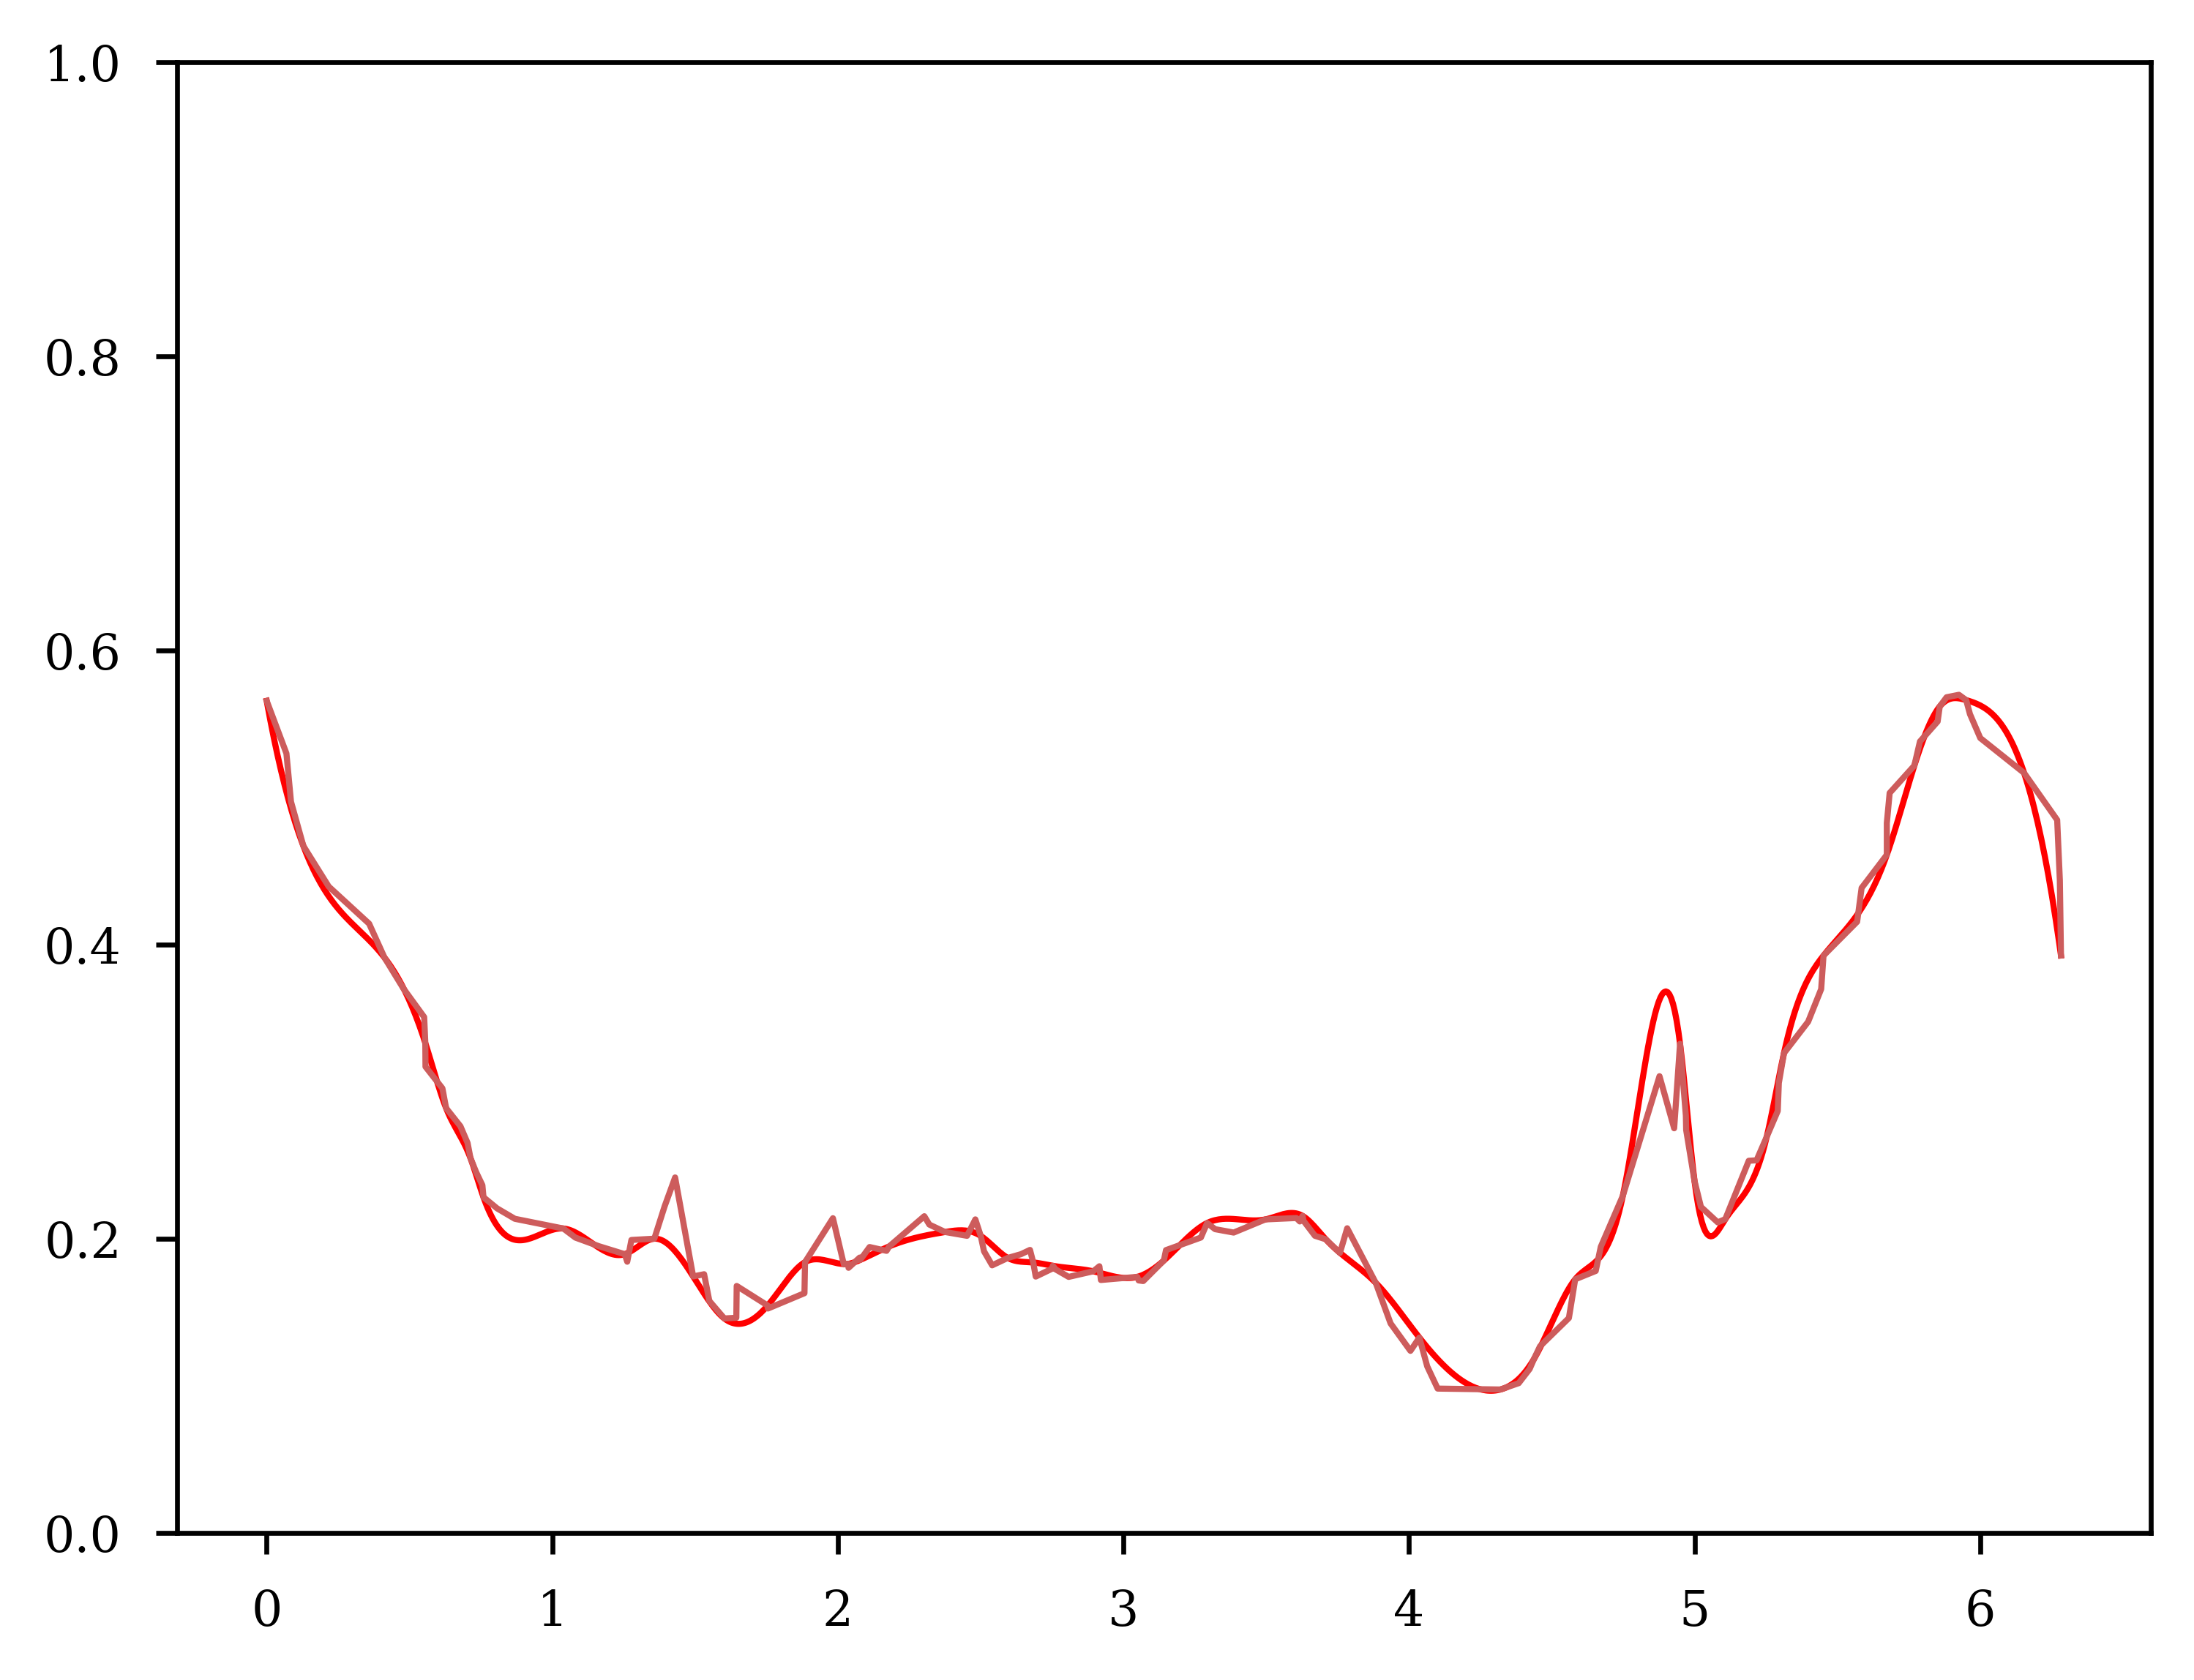

In [912]:
yhat = savgol_filter(values[:-1],51, 4)
yhat = np.concatenate((yhat,[yhat[0]]))

x_p = np.linspace(angles_1.min(), angles_1.max(), 1000)
b = make_interp_spline(angles_1[:-1:3], yhat[:-1:3])
plt.plot(x_p, b(x_p), color = 'r', lw = 1, label = 'Mean')
# plt.plot(angles_1, values, color = 'mediumslateblue', lw = 1, label = 'Mean')
plt.plot(angles_1[:-1] ,yhat[:-1], color = 'indianred', lw = 1, label = 'Mean')
plt.ylim(0,1)

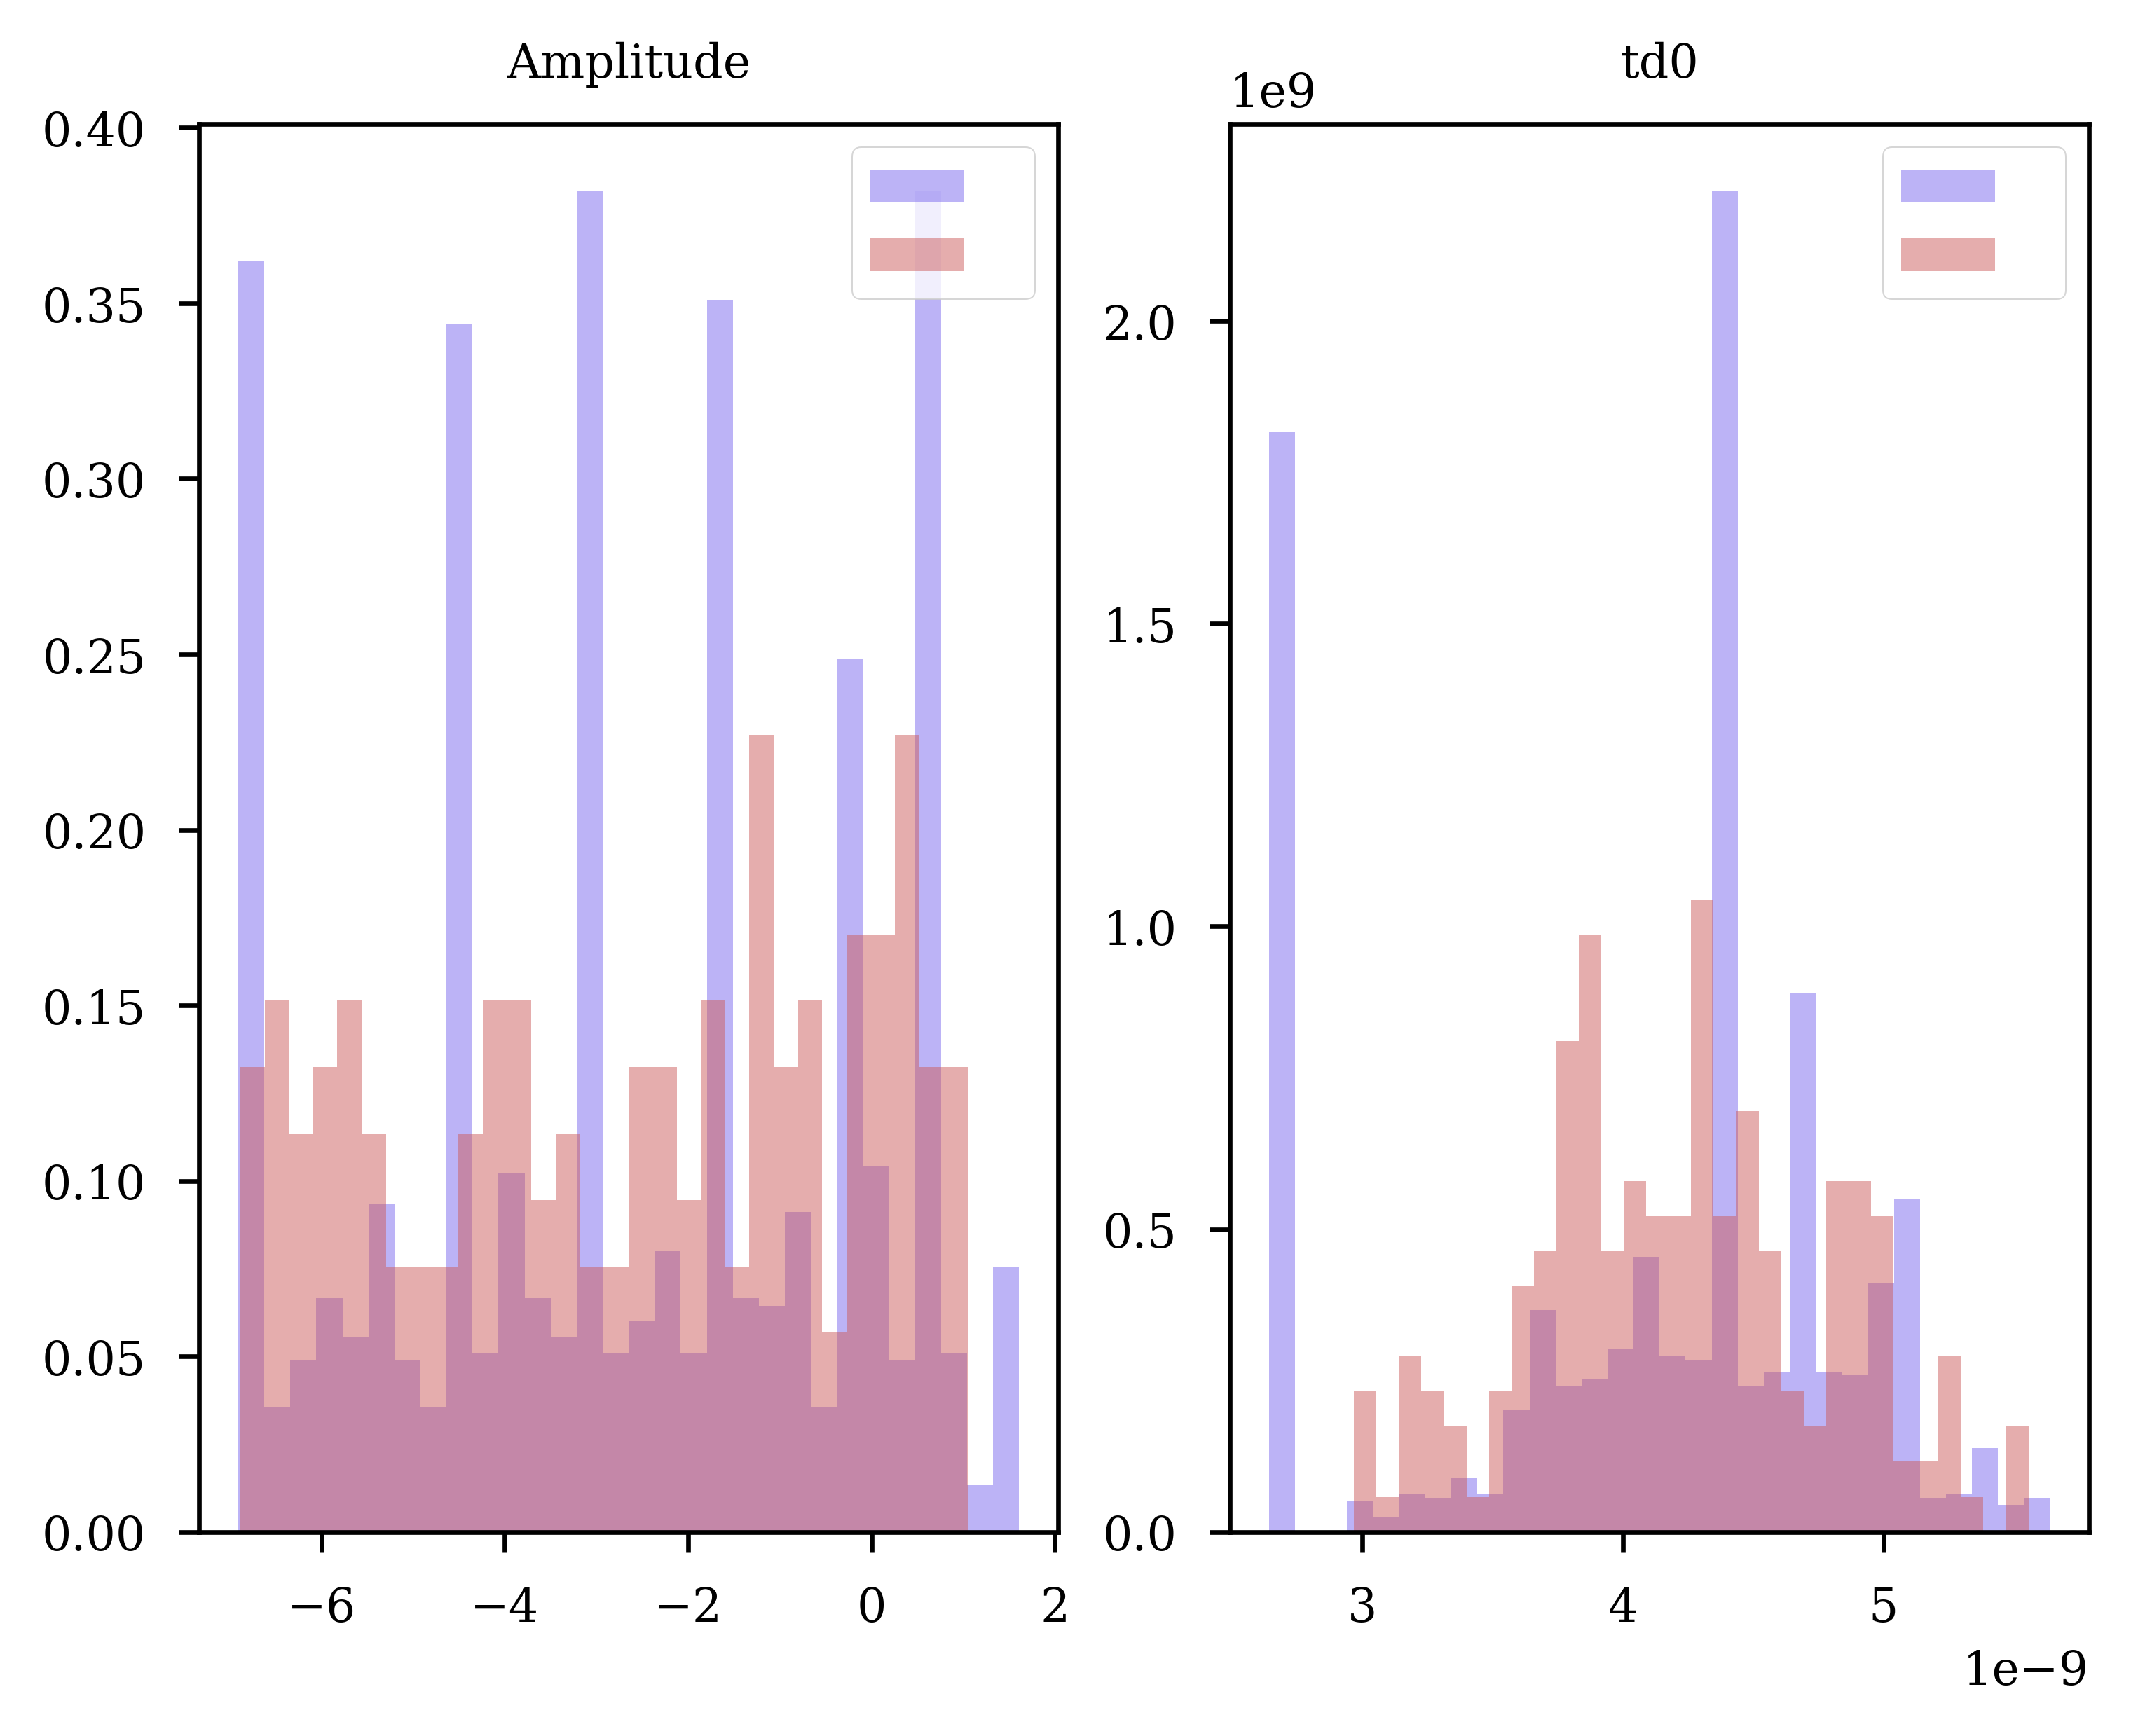

In [232]:
W = 5.8
fig, axes = plt.subplots(1,2, figsize = (W,W * 3/4))
amp_power = df_metrics9['amplitude']
amp = df_metrics['amplitude']
td0_power = df_metrics9['td0']
td0 = df_metrics['td0']
axes[0].hist(amp, bins = 30, color = 'mediumslateblue', alpha = 0.5, label = ' ', density = True)
axes[0].hist(amp_power, bins = 30, color = 'indianred', alpha = 0.5, label = ' ', density = True)
axes[0].set_title('Amplitude')
axes[0].legend()
axes[1].hist(td0, bins = 30, color = 'mediumslateblue', alpha = 0.5, label = ' ', density = True)
axes[1].hist(td0_power, bins = 30, color = 'indianred', alpha = 0.5, label = ' ', density = True)
axes[1].set_title('td0')
axes[1].legend()





In [1]:
W = 7
fig, axes = plt.subplots(1,5, figsize = (W,W * 3/4), layout = 'tight', subplot_kw={'projection': 'polar'})



# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.



res = abs((np.exp(y_test['amplitude']) - np.exp(y_pred))  / np.exp(y_test['amplitude']))

X_plot = X_test.copy()
X_plot['res'] = res

R = 1/np.unique(scaler.inverse_transform(X_test)[:,3])


L = np.unique(scaler.inverse_transform(X_test)[:,2])

lcx = np.unique(scaler.inverse_transform(X_test)[:,0])

lcy = np.unique(scaler.inverse_transform(X_test)[:,1])

teta = np.unique(scaler.inverse_transform(X_test)[:,4])

params = [R, L, lcx, lcy, teta]

for i, ax in enumerate(axes) :
    angles = (params[i] - params[i].std()) * 2 * np.pi / params[i].mean()
    values = X_plot.groupby(params_list[i]).mean()['res']
    sns.kdeplot(x = angles, y = values, ax = ax, color = 'mediumslateblue', alpha = 0.9)
    ax.set_title(params_list[i], family = 'monospace', fontweight = 'bold')
    ax.set_rscale('symlog')

    ax.set_rticks( np.linspace(0,5, 10), color = 'k', labels = [' '] + [' ' for i in np.linspace(0,1,8)] + [' '])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_rlim(0, 5)
    ax.grid(axis = 'y', color = 'k', lw = .5)
    ax.spines['polar'].set_linewidth(2)
    # ax.plot(angles, values, color = 'mediumslateblue',  lw = 1, label = 'Mean')


NameError: name 'plt' is not defined

ValueError: x and y must be the same size

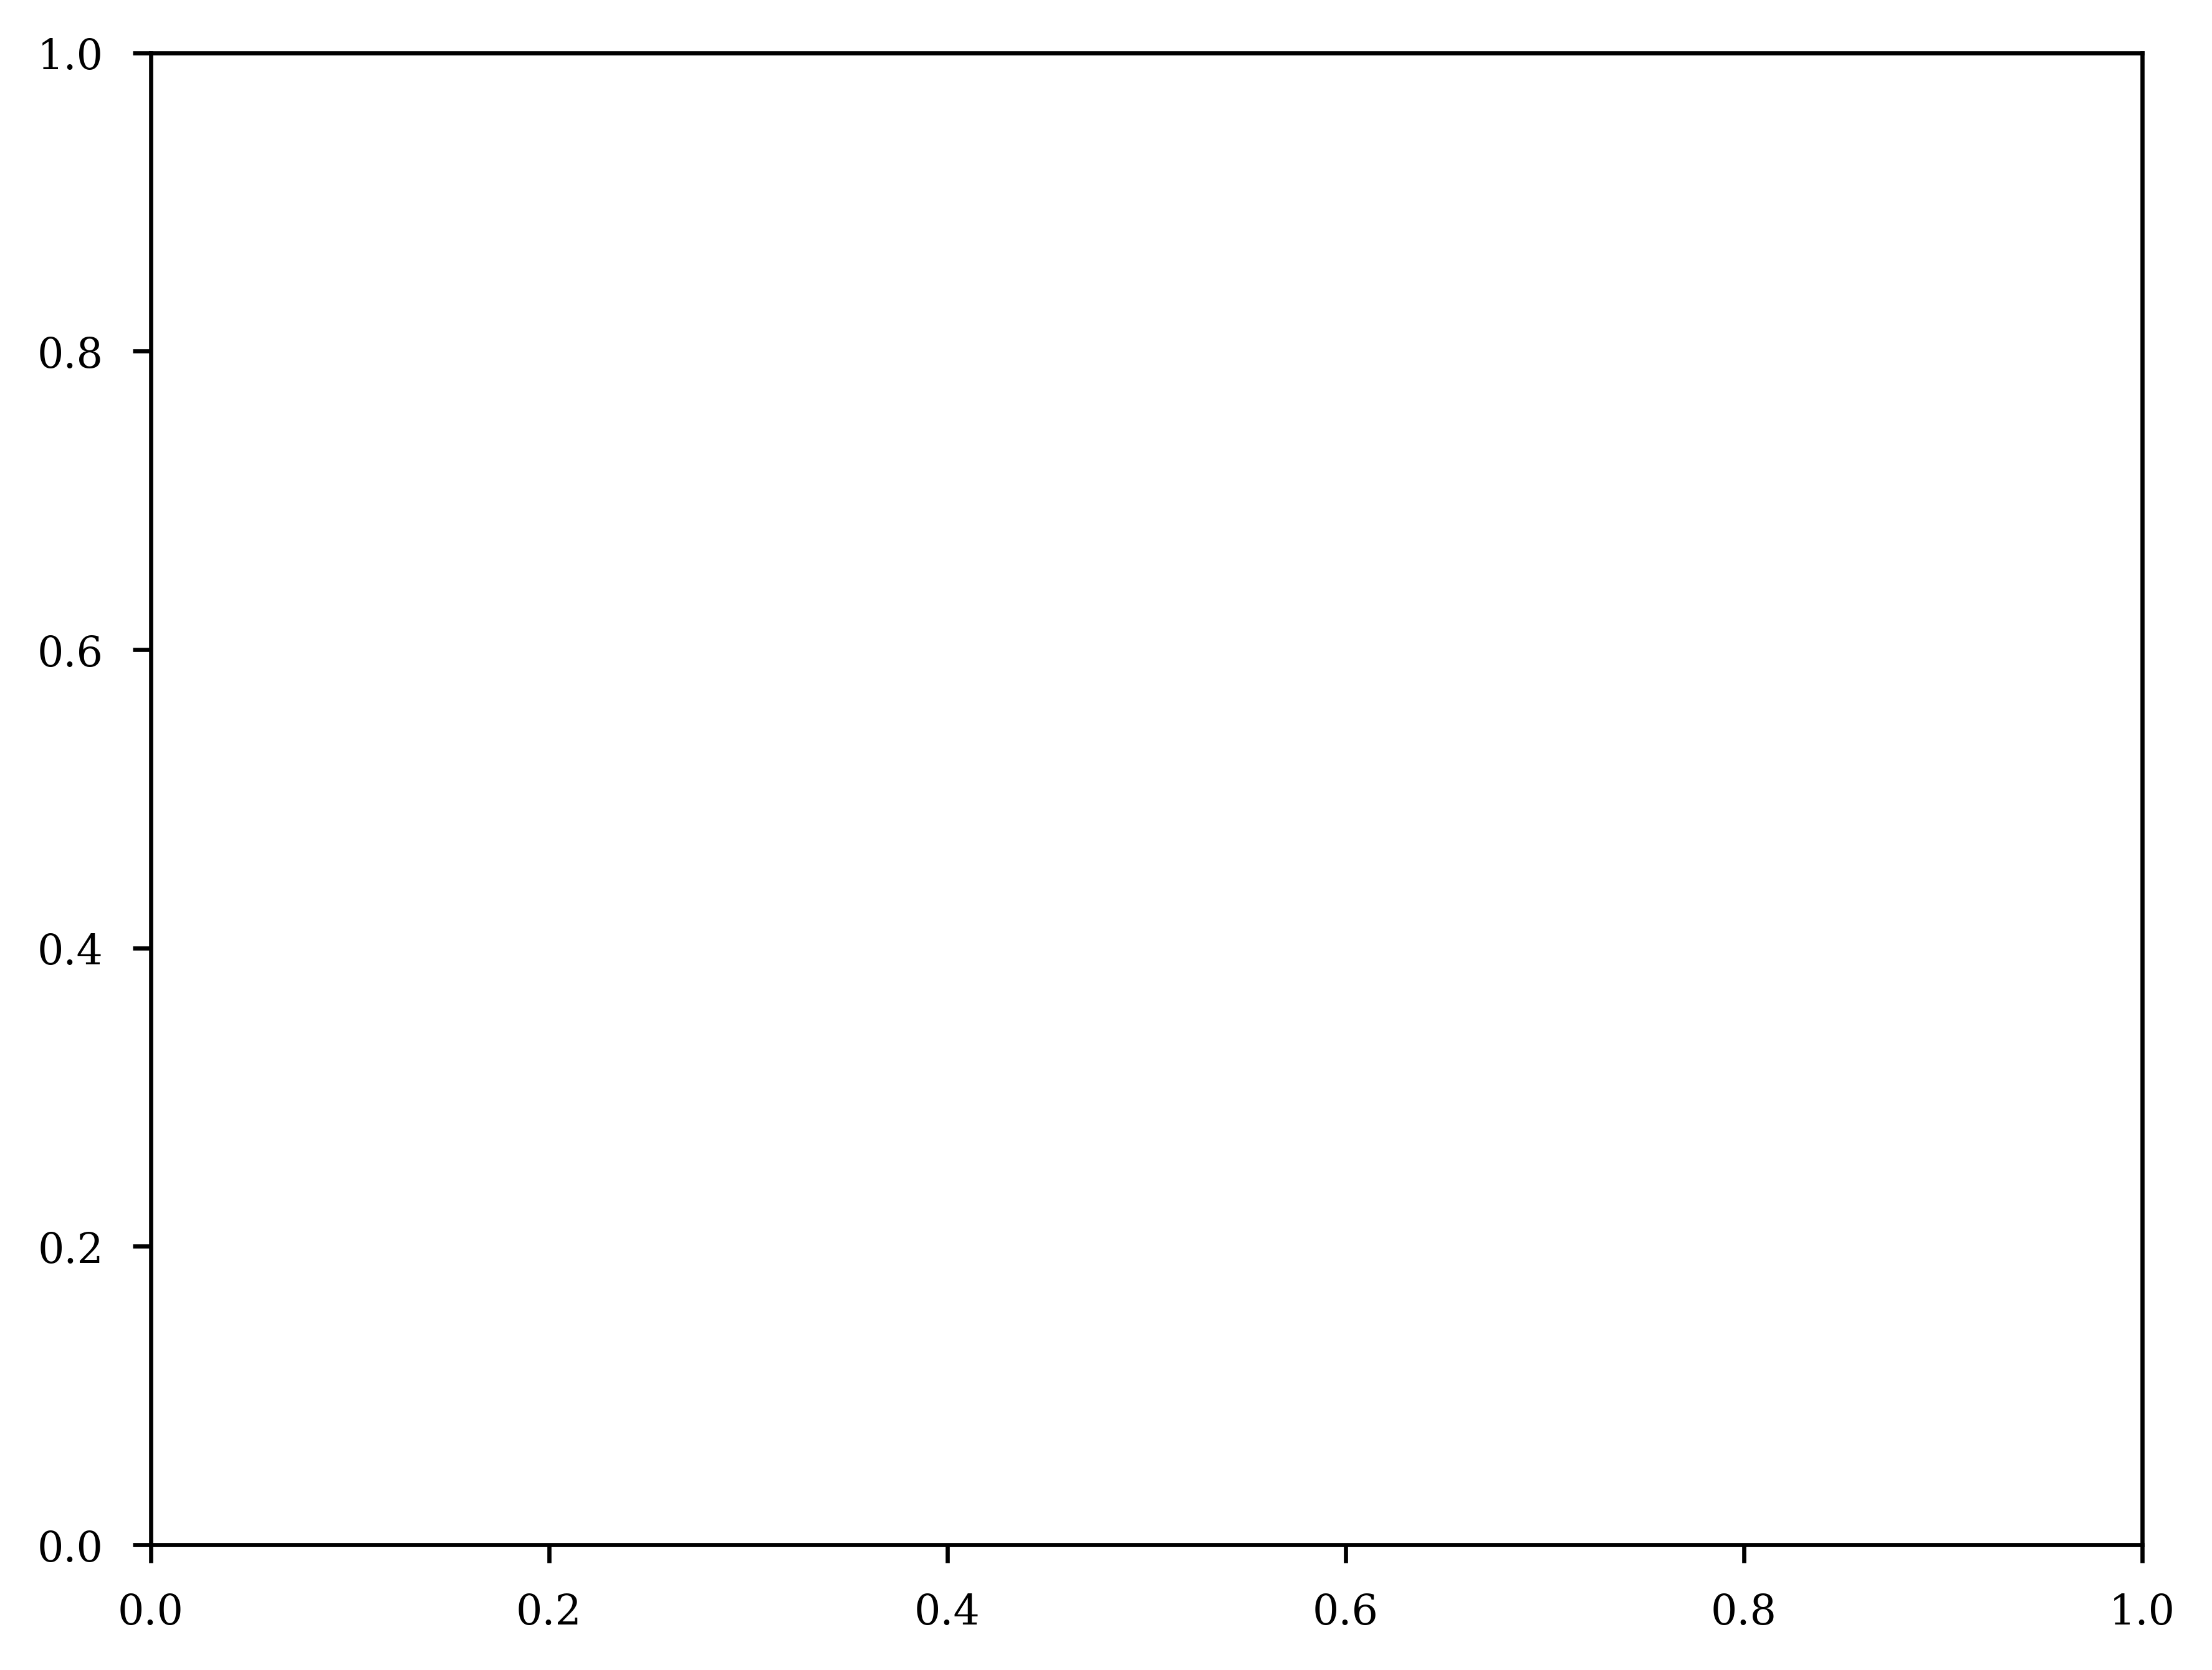

In [72]:
fig, ax = plt.subplots(1, figsize = (W,W * 3/4), layout = 'constrained')
ax.scatter(lev, abs(res))
e = cook_distance(model, input_, amp, 0.5)
e2 = cook_distance(model, input_, amp, 1)
mask = np.argsort(e)
ax.plot(lev[mask], e[mask], color = 'indianred', lw = 0.5, ls = '-.')
ax.plot(lev[mask], e2[mask], color = 'indianred', lw = 0.5, ls = '-.')




In [73]:
lcx = np.loadtxt('../data/exp/lcxs.txt')
L = np.loadtxt('../data/exp/Ls.txt')
rhos = np.loadtxt('../data/exp/rhos.txt')
td1  = np.loadtxt('../data/exp/td_1.txt')
td2  = np.loadtxt('../data/exp/td_2.txt')
td5  = np.loadtxt('../data/exp/td_5.txt')
td8  = np.loadtxt('../data/exp/td_8.txt')

In [74]:
tds = [td1, td2, td5, td8]

In [75]:
hist_td1 = np.quantile(td1, bins2, axis = 0)
hist_td2 = np.quantile(td2, bins2, axis = 0)
hist_td5 = np.quantile(td5, bins2, axis = 0)
hist_td8 = np.quantile(td8, bins2, axis = 0)

In [76]:
input_1 = pd.DataFrame(columns = input_data.columns, data = scaler.transform(np.array([lcx, 0.05*np.ones(15), L, *hist_td1], dtype = np.float128).T))
input_2 = pd.DataFrame(columns = input_data.columns, data = scaler.transform(np.array([lcx, 0.05*np.ones(15), L, *hist_td2], dtype = np.float128).T))
input_3 = pd.DataFrame(columns = input_data.columns, data = scaler.transform(np.array([lcx, 0.05*np.ones(15), L, *hist_td5], dtype = np.float128).T))
input_4 = pd.DataFrame(columns = input_data.columns, data = scaler.transform(np.array([lcx, 0.05*np.ones(15), L, *hist_td8], dtype = np.float128).T))


ValueError: X has 33 features, but StandardScaler is expecting 35 features as input.

In [251]:
raw_1 = np.array([lcx, 0.05*np.ones(15), L, *hist_td1], dtype = np.float128).T
raw_2 = np.array([lcx, 0.05*np.ones(15), L, *hist_td2], dtype = np.float128).T
raw_3 = np.array([lcx, 0.05*np.ones(15), L, *hist_td5], dtype = np.float128).T
raw_4 = np.array([lcx, 0.05*np.ones(15), L, *hist_td8], dtype = np.float128).T

In [252]:
raw = [raw_1, raw_2, raw_3, raw_4]

NameError: name 'input_1' is not defined

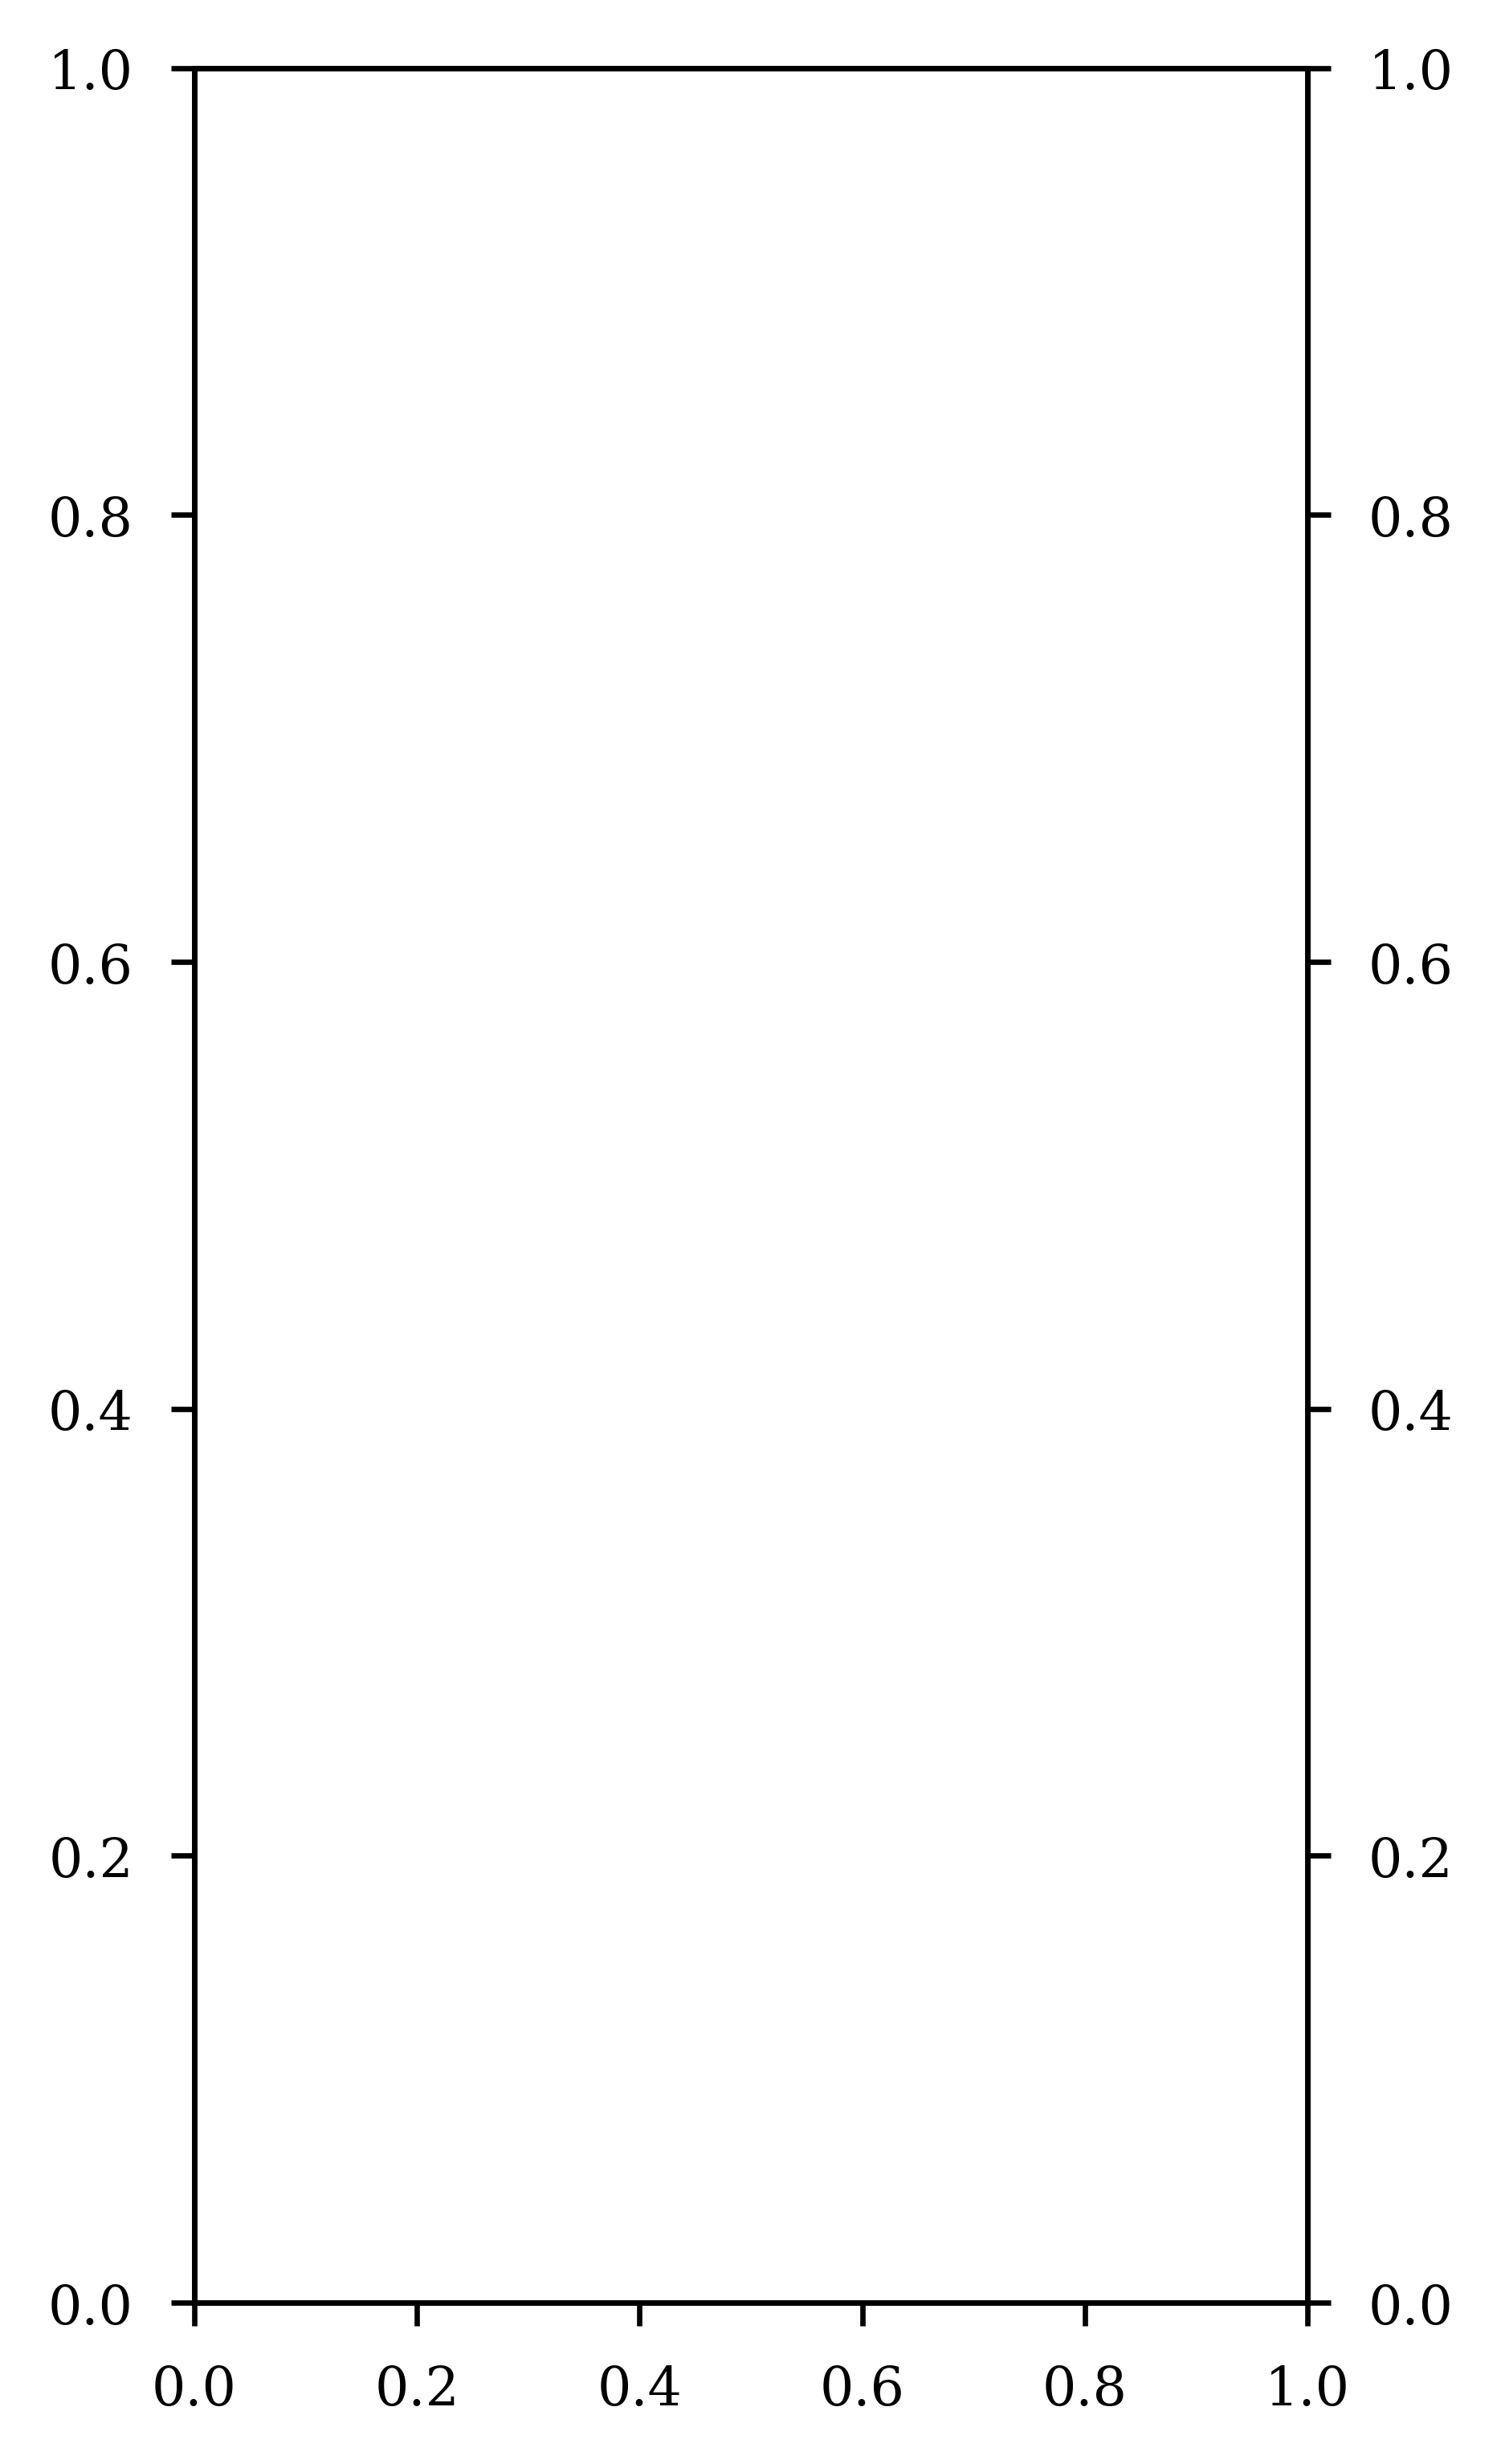

In [253]:
W = 2
fig, ax = plt.subplots(figsize = (3,5), layout = 'constrained')
factor = [1,2,5,8]
ax2 = ax.twinx()
for i, input_ in enumerate([input_1, input_2, input_3, input_4]) :
    dn_theo = np.std(tds[i], axis = 0) * 3e8 / (4 * raw[i][:,2]) * np.sqrt(raw[i][:,0] / raw[i][:,2]) / factor[i]
    pred_2d = model.predict(input_)[:,1]
    ax.plot(rhos, np.exp(pred_2d) / factor[i], marker = markers[i], color = 'k', label = str(i), lw = 0, mec = 'k', mfc = 'none')
    ax2.plot(rhos, dn_theo, marker = markers[i], color = 'r', label = str(i), lw = 0, mec = 'r', mfc = 'none')
    np.save(f'./data/exp/pred_{factor[i]}.npy', pred_2d)
ax.legend()
ax.set_xlabel('rho')
ax.set_ylabel('amp')